## Import Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
from collections import defaultdict

In [2]:
#To display all columns in Jupyter Notebooks
pd.set_option('display.max_columns', 500)

## Retrieve data from Database

In [3]:
#Import MongoClient
from pymongo import MongoClient

#Create a MongoClient to run the MongoDB instance
client = MongoClient('localhost', 27017)

In [4]:
#Connect to existing datbase
db = client.NHANES_Q2

In [5]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'NHANES_Q2')

In [6]:
#Look at existing collections
col = db.list_collection_names()
col.sort()
col

['CA', 'CA_no_ohe', 'CL', 'CL_no_ohe', 'DI', 'DI_no_ohe', 'HD', 'HD_no_ohe']

In [7]:
#Collections
ca = db.CA
ca_no = db.CA_no_ohe

In [8]:
#Create dataframes from database collections
df_ca = pd.DataFrame(list(ca.find()))
df_ca_no = pd.DataFrame(list(ca_no.find()))

In [9]:
#Variable Declarations
df = df_ca.copy()
df_no = df_ca_no.copy()
label = 'MCQ220'
labeldescr = 'Cancer (0-No, 1-Yes)'

## Reorder columns

### Reorder OHE dataframe

In [10]:
#Get a list of columns
cols = list(df)

#Move '_id' column to head of list using dex, pop and insert
cols.insert(0, cols.pop(cols.index('_id')))

#Move 'Year' column to back of list using index, pop and insert
cols.insert(len(df.columns)-1, cols.pop(cols.index('Year')))

#Move 'MEC18YR' column to back of list using index, pop and insert
cols.insert(len(df.columns)-1, cols.pop(cols.index('MEC18YR')))

#Move 'DRX18YR' column to back of list using index, pop and insert
cols.insert(len(df.columns)-1, cols.pop(cols.index('DRX18YR')))

#Move label column to back of list using index, pop and insert
cols.insert(len(df.columns)-1, cols.pop(cols.index(label)))

In [11]:
#Reorder dataframe
df = df.loc[:, cols]
df.head()

,_id,ALQ101_2_0,BMXBMI,BMXHT,BMXWAIST,BMXWT,BPQ020_2_0,BPXDI1,BPXPULS_2_0,BPXSY1,DMDBORN4_2_0,DMDCITZN_2_0,DMDHHSIZ,DMDHREDU,DRD320GW,DRDTSODI,DRXTALCO,DRXTCAFF,DRXTCALC,DRXTCARB,DRXTCHOL,DRXTCOPP,DRXTFIBE,DRXTIRON,DRXTKCAL,DRXTMAGN,DRXTPHOS,DRXTPOTA,DRXTPROT,DRXTTFAT,DRXTVARE,DRXTVB1,DRXTVB12,DRXTVB2,DRXTVB6,DRXTVC,DRXTZINC,HID010_2_0,HUQ010,HUQ020_2_0,HUQ020_3_0,HUQ030_2_0,HUQ030_3_0,HUQ050,HUQ070_2_0,INDFMINC,PAQ635_2_0,PAQ650_2_0,PAQ665_2_0,RIAGENDR_2_0,RIDAGEYR,RIDRETH1_2_0,RIDRETH1_3_0,RIDRETH1_4_0,RIDRETH1_5_0,SMD410_2_0,SMQ680_2_0,Year,MEC18YR,DRX18YR,MCQ220
0,2.0,0,24.90,174.0,98.0,75.4,1,58.0,0,106.0,0,0,1.0,5.0,5.397605e-79,5710.03,5.397605e-79,5.304500e+02,925.37,350.37,313.95,2.08,36.99,37.29,2463.00,502.25,1974.57,4672.48,123.16,71.95,923.91,2.11,8.68,3.25,2.90,119.12,41.61,0,2.0,1,0,0,0,3.0,0,8.0,1,1,1,0,77.0,0,1,0,0,1,1,0,3408.044382,3315.985398,1
1,5.0,0,29.10,178.3,99.9,92.5,0,82.0,0,122.0,0,0,3.0,4.0,1.298000e+03,3756.36,3.456000e+01,5.397605e-79,1626.38,253.98,180.57,1.95,17.28,27.22,2658.14,367.72,1811.55,3743.15,97.13,114.52,1298.44,2.62,6.66,3.05,2.92,112.19,10.17,0,2.0,0,1,0,0,3.0,1,11.0,1,0,0,0,49.0,0,1,0,0,1,0,0,10219.103963,13105.246918,0
2,12.0,0,30.62,180.0,112.8,99.2,0,108.0,0,182.0,0,0,4.0,2.0,3.304000e+03,7511.18,5.397605e-79,3.090200e+02,1292.81,309.57,1242.06,1.70,18.68,23.31,3348.31,435.55,2364.22,4607.26,130.02,178.85,923.80,2.43,8.36,3.31,2.40,70.96,17.47,0,4.0,0,1,0,0,2.0,1,11.0,1,1,0,0,37.0,0,1,0,0,1,1,0,10149.365568,13280.150390,0
3,15.0,0,26.68,174.9,86.7,81.6,1,68.0,0,106.0,0,0,2.0,5.0,2.478000e+03,3832.49,1.315000e+01,4.328500e+02,814.59,264.69,596.30,1.40,16.15,16.14,2573.14,266.80,1321.30,3171.15,82.66,127.03,720.50,1.38,4.64,1.79,1.72,36.11,11.77,0,3.0,0,1,0,0,3.0,1,8.0,0,0,0,1,38.0,0,1,0,0,0,0,0,11437.714415,18684.987158,0
4,16.0,1,19.96,144.2,74.4,41.5,1,62.0,0,164.0,0,0,1.0,1.0,2.360000e+02,2129.94,5.397605e-79,5.397605e-79,509.35,112.24,124.95,0.66,16.36,7.54,898.38,183.60,689.38,1458.25,39.62,33.87,1844.08,0.88,1.19,0.89,0.77,69.19,6.47,0,3.0,0,1,0,0,1.0,1,1.0,1,0,1,1,85.0,0,0,1,0,1,1,0,1957.498400,1304.207395,0


### Reorder non-OHE dataframe

In [12]:
#Get a list of columns
cols = list(df_no)

#Move '_id' column to head of list using dex, pop and insert
cols.insert(0, cols.pop(cols.index('_id')))

#Move 'Year' column to back of list using index, pop and insert
cols.insert(len(df_no.columns)-1, cols.pop(cols.index('Year')))

#Move 'MEC18YR' column to back of list using index, pop and insert
cols.insert(len(df_no.columns)-1, cols.pop(cols.index('MEC18YR')))

#Move 'DRX18YR' column to back of list using index, pop and insert
cols.insert(len(df_no.columns)-1, cols.pop(cols.index('DRX18YR')))

#Move label column to back of list using index, pop and insert
cols.insert(len(df_no.columns)-1, cols.pop(cols.index(label)))

In [13]:
#Reorder dataframe
df_no = df_no.loc[:, cols]
df_no.head()

,_id,ALQ101,BMXBMI,BMXHT,BMXWAIST,BMXWT,BPQ020,BPXDI1,BPXPULS,BPXSY1,DMDBORN4,DMDCITZN,DMDHHSIZ,DMDHREDU,DRD320GW,DRDTSODI,DRXTALCO,DRXTCAFF,DRXTCALC,DRXTCARB,DRXTCHOL,DRXTCOPP,DRXTFIBE,DRXTIRON,DRXTKCAL,DRXTMAGN,DRXTPHOS,DRXTPOTA,DRXTPROT,DRXTTFAT,DRXTVARE,DRXTVB1,DRXTVB12,DRXTVB2,DRXTVB6,DRXTVC,DRXTZINC,HID010,HUQ010,HUQ020,HUQ030,HUQ050,HUQ070,INDFMINC,PAQ635,PAQ650,PAQ665,RIAGENDR,RIDAGEYR,RIDRETH1,SMAQUEX,SMD410,SMQ680,Year,MEC18YR,DRX18YR,MCQ220
0,2.0,1.0,24.90,174.0,98.0,75.4,2.0,58.0,1.0,106.0,1.0,1.0,1.0,5.0,5.397605e-79,5710.03,5.397605e-79,5.304500e+02,925.37,350.37,313.95,2.08,36.99,37.29,2463.00,502.25,1974.57,4672.48,123.16,71.95,923.91,2.11,8.68,3.25,2.90,119.12,41.61,1.0,2.0,2.0,1.0,3.0,1.0,8.0,2.0,2.0,2.0,1.0,77.0,3.0,2.0,2.0,2.0,0,3408.044382,3315.985398,1
1,5.0,1.0,29.10,178.3,99.9,92.5,1.0,82.0,1.0,122.0,1.0,1.0,3.0,4.0,1.298000e+03,3756.36,3.456000e+01,5.397605e-79,1626.38,253.98,180.57,1.95,17.28,27.22,2658.14,367.72,1811.55,3743.15,97.13,114.52,1298.44,2.62,6.66,3.05,2.92,112.19,10.17,1.0,2.0,3.0,1.0,3.0,2.0,11.0,2.0,1.0,1.0,1.0,49.0,3.0,2.0,2.0,1.0,0,10219.103963,13105.246918,0
2,12.0,1.0,30.62,180.0,112.8,99.2,1.0,108.0,1.0,182.0,1.0,1.0,4.0,2.0,3.304000e+03,7511.18,5.397605e-79,3.090200e+02,1292.81,309.57,1242.06,1.70,18.68,23.31,3348.31,435.55,2364.22,4607.26,130.02,178.85,923.80,2.43,8.36,3.31,2.40,70.96,17.47,1.0,4.0,3.0,1.0,2.0,2.0,11.0,2.0,2.0,1.0,1.0,37.0,3.0,2.0,2.0,2.0,0,10149.365568,13280.150390,0
3,15.0,1.0,26.68,174.9,86.7,81.6,2.0,68.0,1.0,106.0,1.0,1.0,2.0,5.0,2.478000e+03,3832.49,1.315000e+01,4.328500e+02,814.59,264.69,596.30,1.40,16.15,16.14,2573.14,266.80,1321.30,3171.15,82.66,127.03,720.50,1.38,4.64,1.79,1.72,36.11,11.77,1.0,3.0,3.0,1.0,3.0,2.0,8.0,1.0,1.0,1.0,2.0,38.0,3.0,2.0,1.0,1.0,0,11437.714415,18684.987158,0
4,16.0,2.0,19.96,144.2,74.4,41.5,2.0,62.0,1.0,164.0,1.0,1.0,1.0,1.0,2.360000e+02,2129.94,5.397605e-79,5.397605e-79,509.35,112.24,124.95,0.66,16.36,7.54,898.38,183.60,689.38,1458.25,39.62,33.87,1844.08,0.88,1.19,0.89,0.77,69.19,6.47,1.0,3.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,85.0,4.0,2.0,2.0,2.0,0,1957.498400,1304.207395,0


# Exploratory Data Analysis

### Analysis of Data

In [14]:
import seaborn as sns

In [15]:
df_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33074 entries, 0 to 33073
Data columns (total 57 columns):
_id         33074 non-null float64
ALQ101      33074 non-null float64
BMXBMI      33074 non-null float64
BMXHT       33074 non-null float64
BMXWAIST    33074 non-null float64
BMXWT       33074 non-null float64
BPQ020      33074 non-null float64
BPXDI1      33074 non-null float64
BPXPULS     33074 non-null float64
BPXSY1      33074 non-null float64
DMDBORN4    33074 non-null float64
DMDCITZN    33074 non-null float64
DMDHHSIZ    33074 non-null float64
DMDHREDU    33074 non-null float64
DRD320GW    33074 non-null float64
DRDTSODI    33074 non-null float64
DRXTALCO    33074 non-null float64
DRXTCAFF    33074 non-null float64
DRXTCALC    33074 non-null float64
DRXTCARB    33074 non-null float64
DRXTCHOL    33074 non-null float64
DRXTCOPP    33074 non-null float64
DRXTFIBE    33074 non-null float64
DRXTIRON    33074 non-null float64
DRXTKCAL    33074 non-null float64
DRXTMAGN    3307

### Define Categorical & Numerical Features

In [16]:
#Change columns to category
#Columns to remove: 
#DRX18YR - 18 Year weight
#MEC18YR - 18 year Weight
#Year - Year of observation
#_id - Unique ID to identify individual

cat_cols = ['DMDBORN4',
            'DMDCITZN',
            'DMDHHSIZ',
            'DMDHREDU',
            'INDFMINC',
            'RIAGENDR',
            'RIDRETH1',
            'ALQ101',
            'DIQ010',
            'BPQ020',
            'BPXPULS',
            'PAQ635',
            'PAQ650',
            'PAQ665',
            'SMAQUEX',
            'SMQ680',
            'SMD410',
            'MCQ010',
            'MCQ160C',
            'MCQ220',
            'MCQ160K',
            'HID010',
            'HUQ010',
            'HUQ020',
            'HUQ030',
            'HUQ050',
            'HUQ070',
            'WHQ030',
            'WHQ040']

num_cols = ['RIDAGEYR',
            'DRD320GW',
             'DRDTSODI',
             'DRX18YR',
             'DRXTALCO',
             'DRXTCAFF',
             'DRXTCALC',
             'DRXTCARB',
             'DRXTCHOL',
             'DRXTCOPP',
             'DRXTFIBE',
             'DRXTIRON',
             'DRXTKCAL',
             'DRXTMAGN',
             'DRXTMFAT',
             'DRXTPFAT',
             'DRXTPHOS',
             'DRXTPOTA',
             'DRXTPROT',
             'DRXTSFAT',
             'DRXTTFAT',
             'DRXTVARE',
             'DRXTVB1',
             'DRXTVB12',
             'DRXTVB2',
             'DRXTVB6',
             'DRXTVC',
             'DRXTZINC',   
             'BPXDI1',
             'BPXSY1',
             'LBDHDL',
             'LBDHDLSI',
             'LBDLDL',
             'LBDLDLSI',
             'LBDTCSI',
             'LBDTRSI',
             'LBXTC',
             'LBXTR',
             'BMXBMI',
             'BMXHT',
             'BMXWAIST',
             'BMXWT'
]


def recat_cols(df, col_names):
    for x in col_names:
        if x in cat_cols:
            df[x] = df[x].astype('category')
    return df

col_names = df_no.columns
df_no = recat_cols(df_no, col_names)

In [17]:
#Recategorized columns
df_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33074 entries, 0 to 33073
Data columns (total 57 columns):
_id         33074 non-null float64
ALQ101      33074 non-null category
BMXBMI      33074 non-null float64
BMXHT       33074 non-null float64
BMXWAIST    33074 non-null float64
BMXWT       33074 non-null float64
BPQ020      33074 non-null category
BPXDI1      33074 non-null float64
BPXPULS     33074 non-null category
BPXSY1      33074 non-null float64
DMDBORN4    33074 non-null category
DMDCITZN    33074 non-null category
DMDHHSIZ    33074 non-null category
DMDHREDU    33074 non-null category
DRD320GW    33074 non-null float64
DRDTSODI    33074 non-null float64
DRXTALCO    33074 non-null float64
DRXTCAFF    33074 non-null float64
DRXTCALC    33074 non-null float64
DRXTCARB    33074 non-null float64
DRXTCHOL    33074 non-null float64
DRXTCOPP    33074 non-null float64
DRXTFIBE    33074 non-null float64
DRXTIRON    33074 non-null float64
DRXTKCAL    33074 non-null float64
DRXTMAGN 

## Plots of Features

### Categorical Features

In [18]:
#Get Categorical Features Only
df_cat = df_no.copy()
df_cat = df_cat.select_dtypes(include=['category'])
df_cat = df_cat.drop([label], axis=1)

In [19]:
df_cat.head()

,ALQ101,BPQ020,BPXPULS,DMDBORN4,DMDCITZN,DMDHHSIZ,DMDHREDU,HID010,HUQ010,HUQ020,HUQ030,HUQ050,HUQ070,INDFMINC,PAQ635,PAQ650,PAQ665,RIAGENDR,RIDRETH1,SMAQUEX,SMD410,SMQ680
0,1.0,2.0,1.0,1.0,1.0,1.0,5.0,1.0,2.0,2.0,1.0,3.0,1.0,8.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0
1,1.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,2.0,3.0,1.0,3.0,2.0,11.0,2.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0
2,1.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,4.0,3.0,1.0,2.0,2.0,11.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0
3,1.0,2.0,1.0,1.0,1.0,2.0,5.0,1.0,3.0,3.0,1.0,3.0,2.0,8.0,1.0,1.0,1.0,2.0,3.0,2.0,1.0,1.0
4,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,4.0,2.0,2.0,2.0


In [20]:
df_cat.shape

(33074, 22)

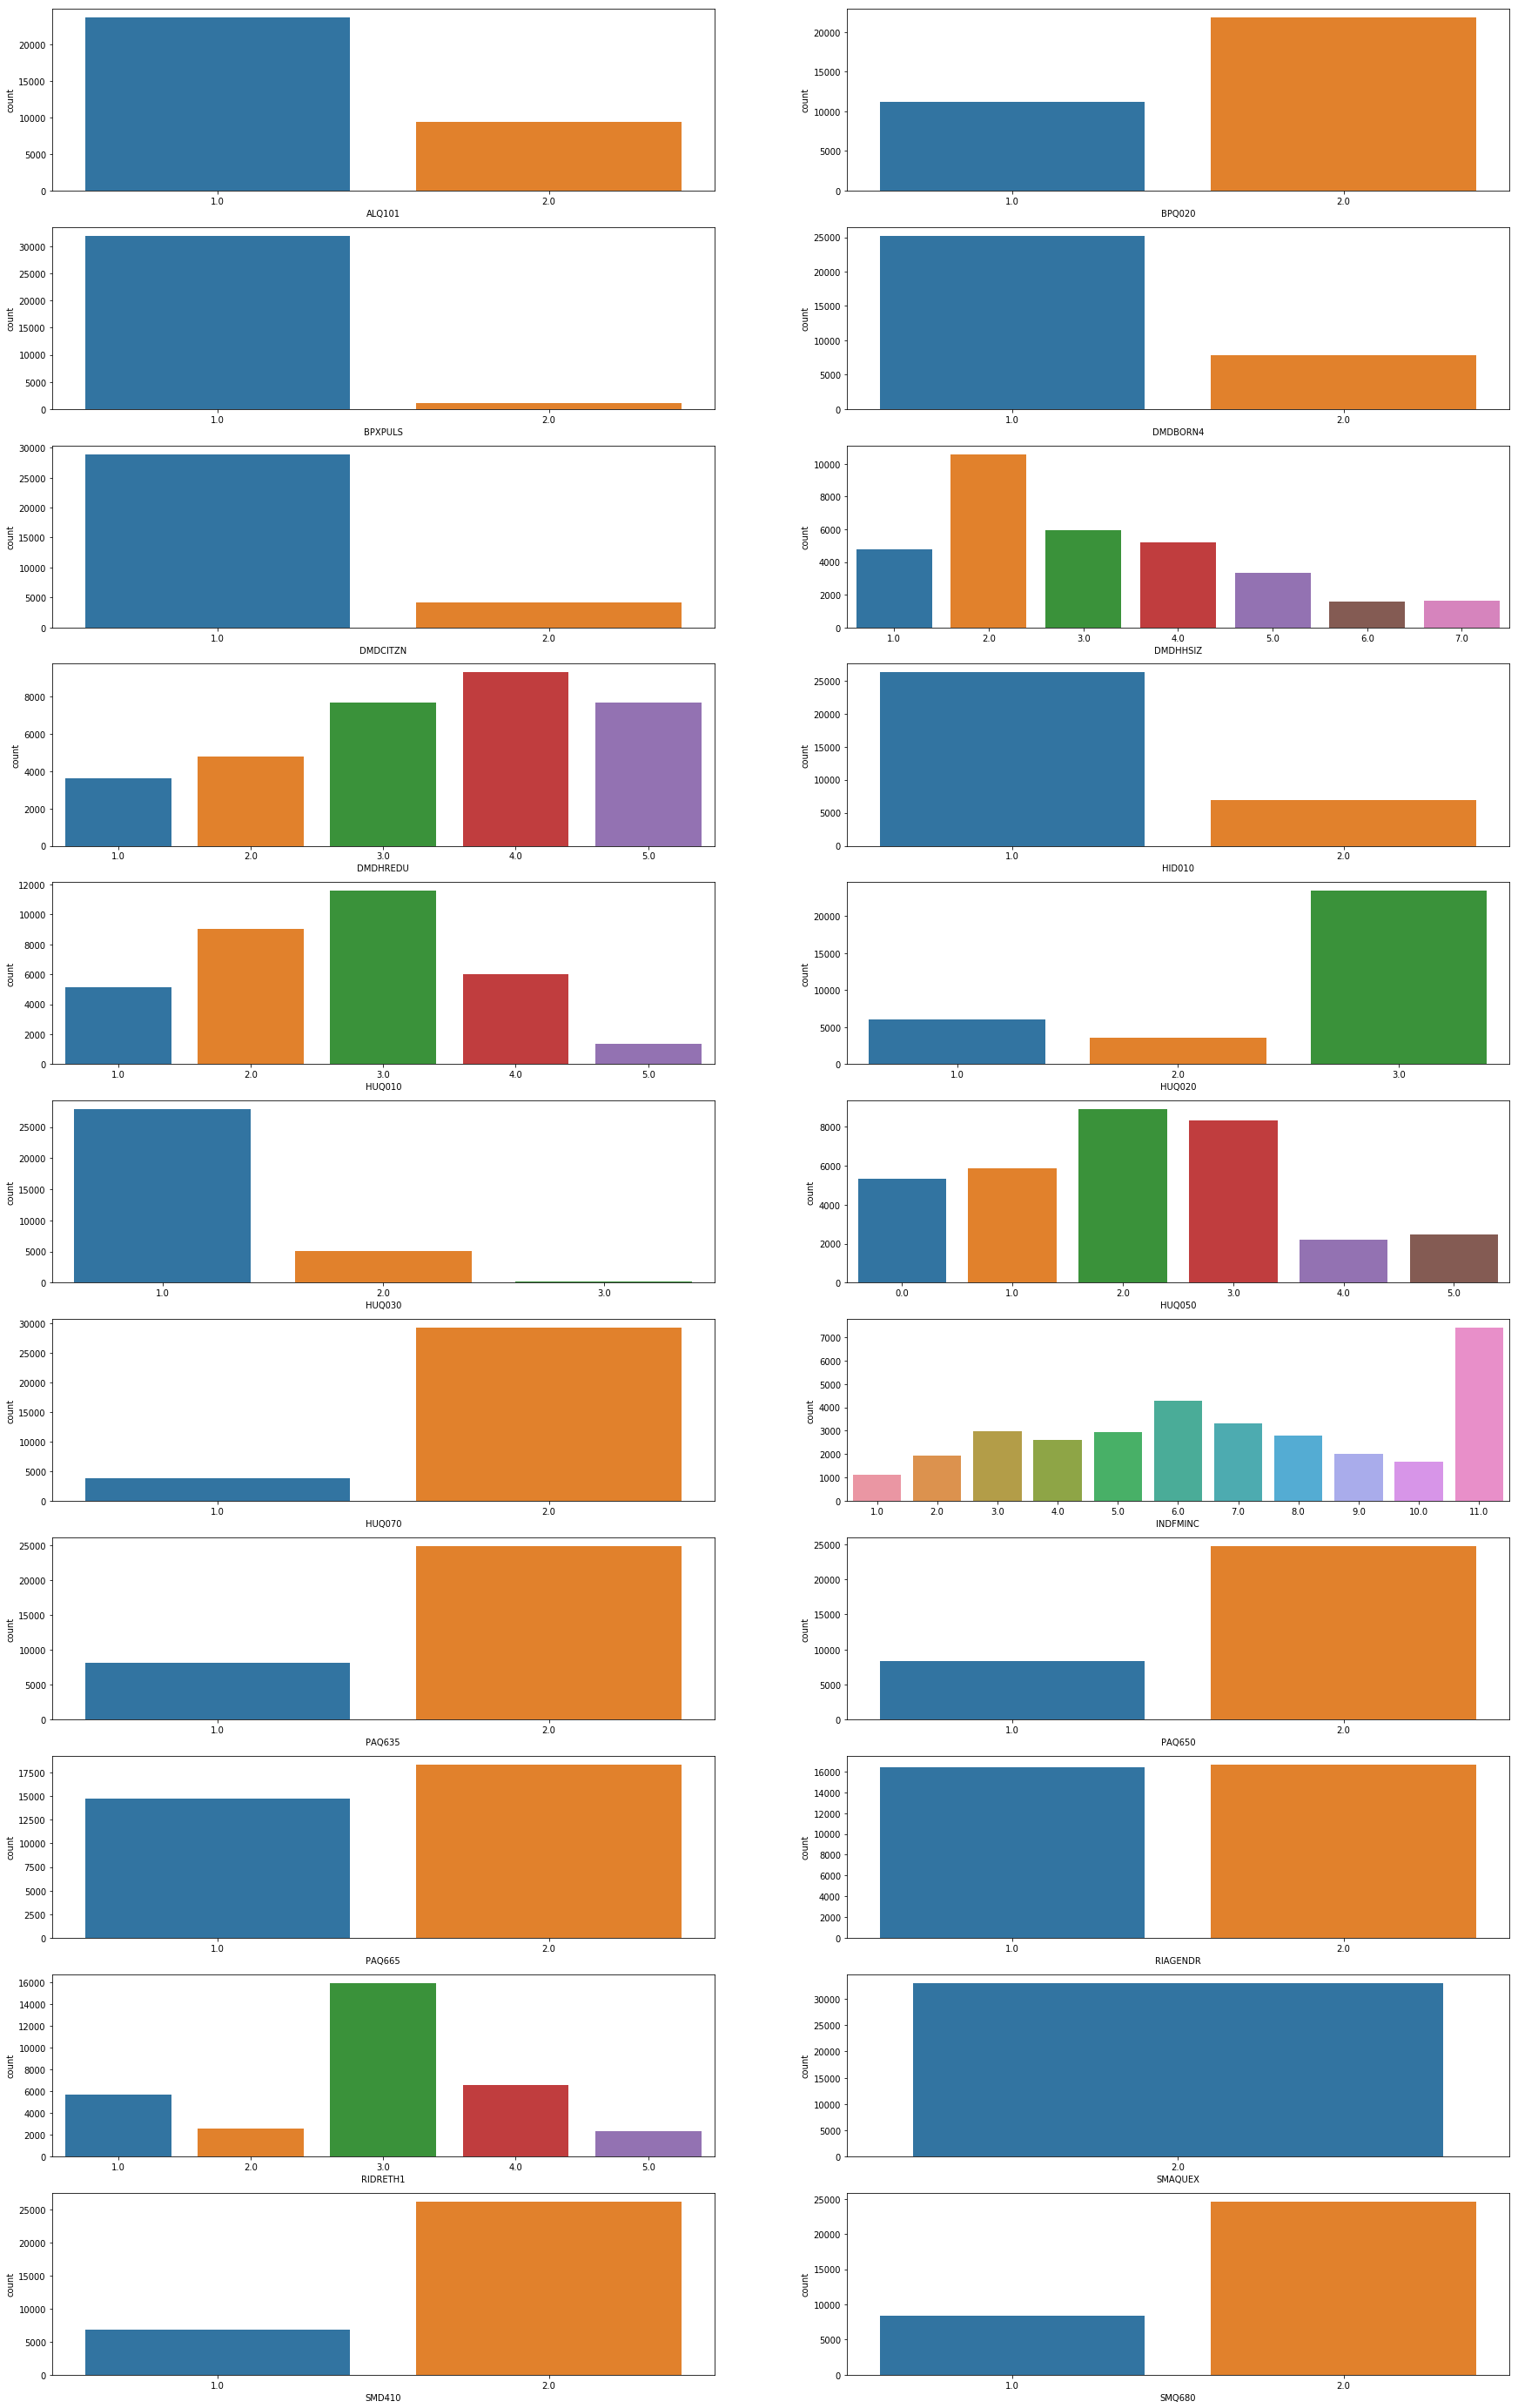

In [21]:
fig, ax = plt.subplots(11, 2, figsize=(30,50))
ax = ax.flatten()
for a, catplot in zip(ax, list(df_cat.columns)):
    sns.countplot(x=catplot, data=df_cat, ax=a)
plt.show()

### Numerical Features

In [22]:
#Get Numerical Features Only
df_num = df_no.copy()
df_num = df_num.select_dtypes(include=['float64'])
df_num = df_num.drop(['_id','MEC18YR','DRX18YR'], axis=1)

In [23]:
df_num.shape

(33074, 30)

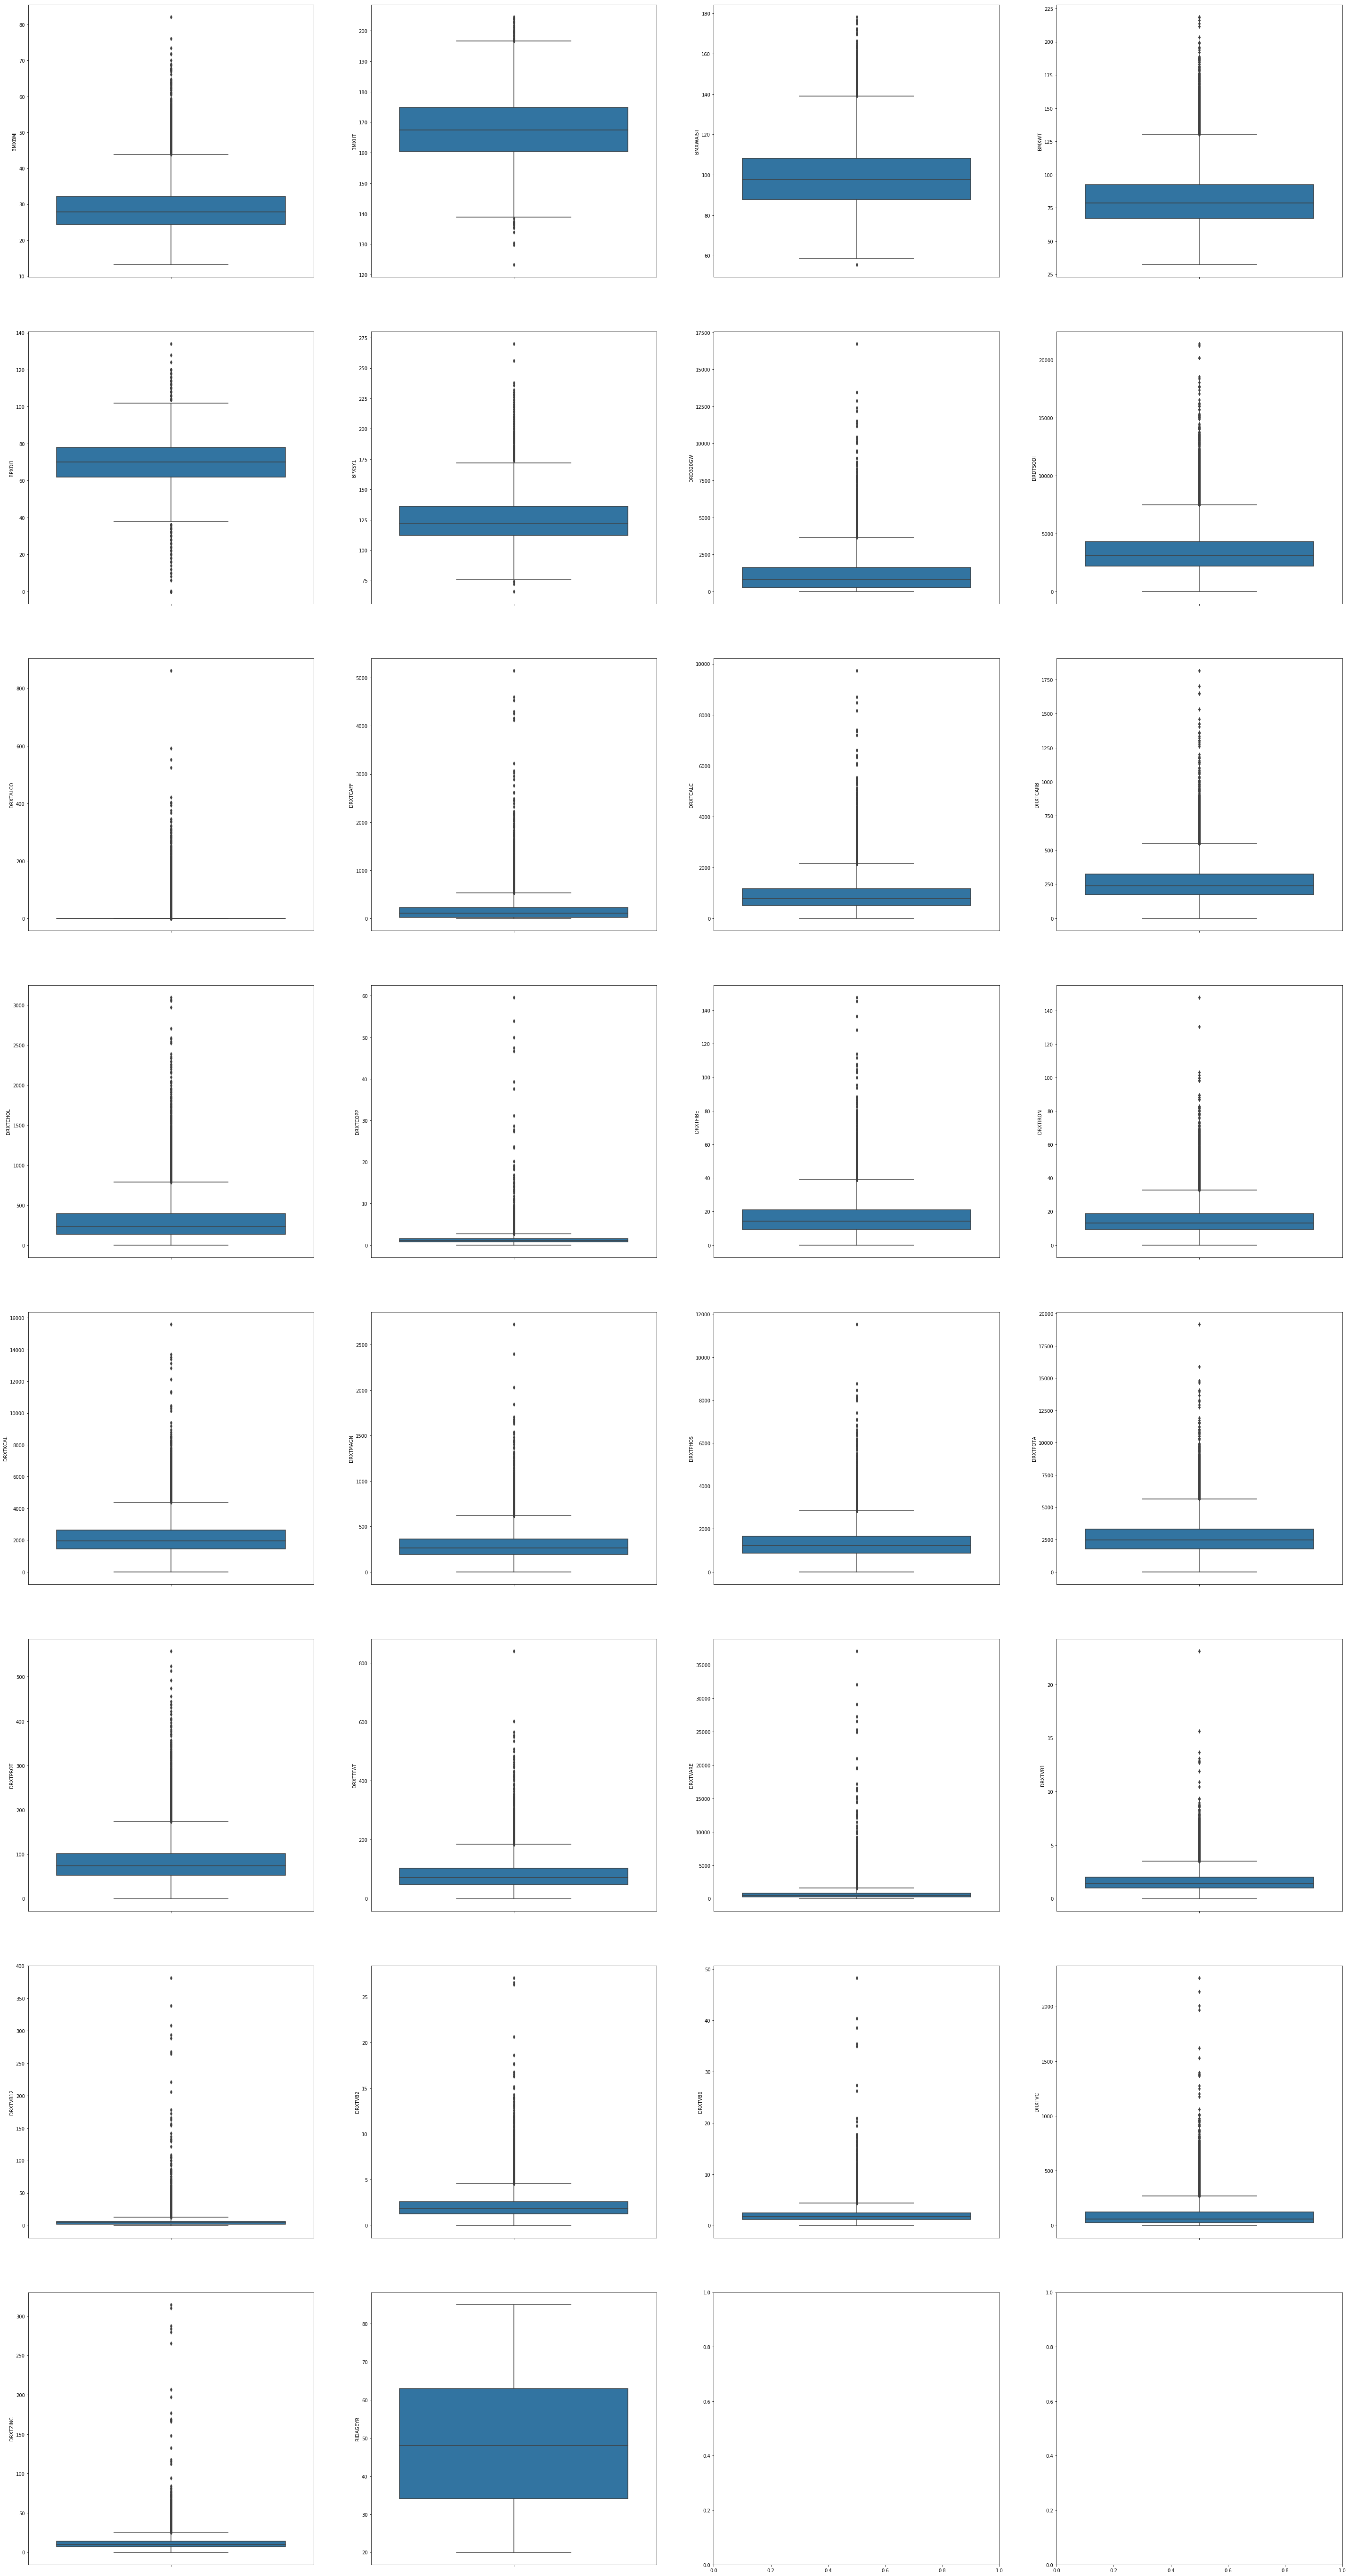

In [24]:
fig, ax = plt.subplots(8, 4, figsize=(50,100))
ax = ax.flatten()
for a, bp in zip(ax, list(df_num.columns)):
    sns.boxplot(y=bp, data=df_num, ax=a)
plt.show()

### Class Distribution

In [25]:
label_count = df_no.groupby(label, as_index = False).count()

In [26]:
#Count of class labels
class_names = list(label_count[label]) #Count the different labels
count = list(label_count['_id']) #Sum of different labels
count

[29993, 3081]

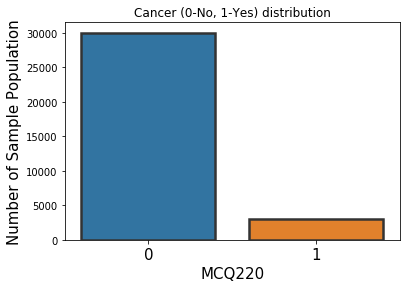

In [27]:
#Bar Plot of Class Labels
index = np.arange(len(class_names))
sns.barplot(x=class_names, y=count, linewidth=2.5, errcolor=".2", edgecolor=".2")
plt.xlabel(label, fontsize=15)
plt.ylabel('Number of Sample Population', fontsize=15)
plt.xticks(index, class_names, fontsize=15)
plt.title(labeldescr+' distribution')
plt.show()

In [28]:
#Find balance of labels
sum(df_no[label]==1)/(len(df_no[label]))
#0.90685 in majority class - No Cancer
#0.09315 in minority class - Cancer

0.09315474390760113

## Class distribution as percentage of years

In [29]:
label_perc = df_no.groupby(['Year',label], as_index = False).count()

In [30]:
lp = label_perc[['Year', '_id',label]].copy()

In [31]:
perc = lp.groupby(['Year', '_id']).agg({'_id': 'sum'})
perc = perc.rename(columns={ perc.columns[0]: "pcts" })
perc = perc.sort_values(by=['Year','pcts'], ascending=[True, False])
# Change: groupby Year and divide by sum
label_pcts = perc.groupby(level=0).apply(lambda x: x / float(x.sum()))

In [32]:
#Get percentage values
lp['Percentages'] = label_pcts.values

In [33]:
lp.head()

,Year,_id,MCQ220,Percentages
0,0,2674,0,0.920799
1,0,230,1,0.079201
2,1,3230,0,0.911657
3,1,313,1,0.088343
4,2,2849,0,0.907614


In [34]:
year_names = list(lp['Year'])
class_names = list(lp[label])

In [35]:
perc = list(lp['Percentages'])

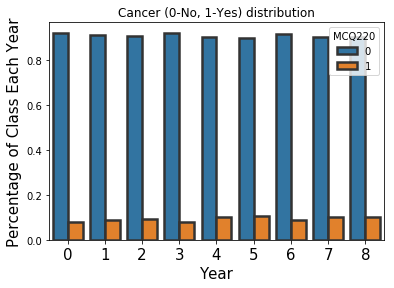

In [36]:
sns.barplot(x='Year', y='Percentages', data=lp, hue=label, linewidth=2.5, errcolor=".2", edgecolor=".2")
plt.xlabel('Year', fontsize=15)
plt.ylabel('Percentage of Class Each Year', fontsize=15)
plt.xticks(fontsize=15)
plt.title(labeldescr+' distribution')
plt.show()

## Correlation of Numerical Features

### Pearson's Coefficient

#### Correlation of Numerical features

In [37]:
df_no.shape

(33074, 57)

In [38]:
#get Correlations of each features in dataset
x = ['_id', 'Year', 'MEC18YR', 'DRX18YR']

corrmat = df_no[df_no.columns.difference(x)].corr()
top_corr_features = corrmat.index

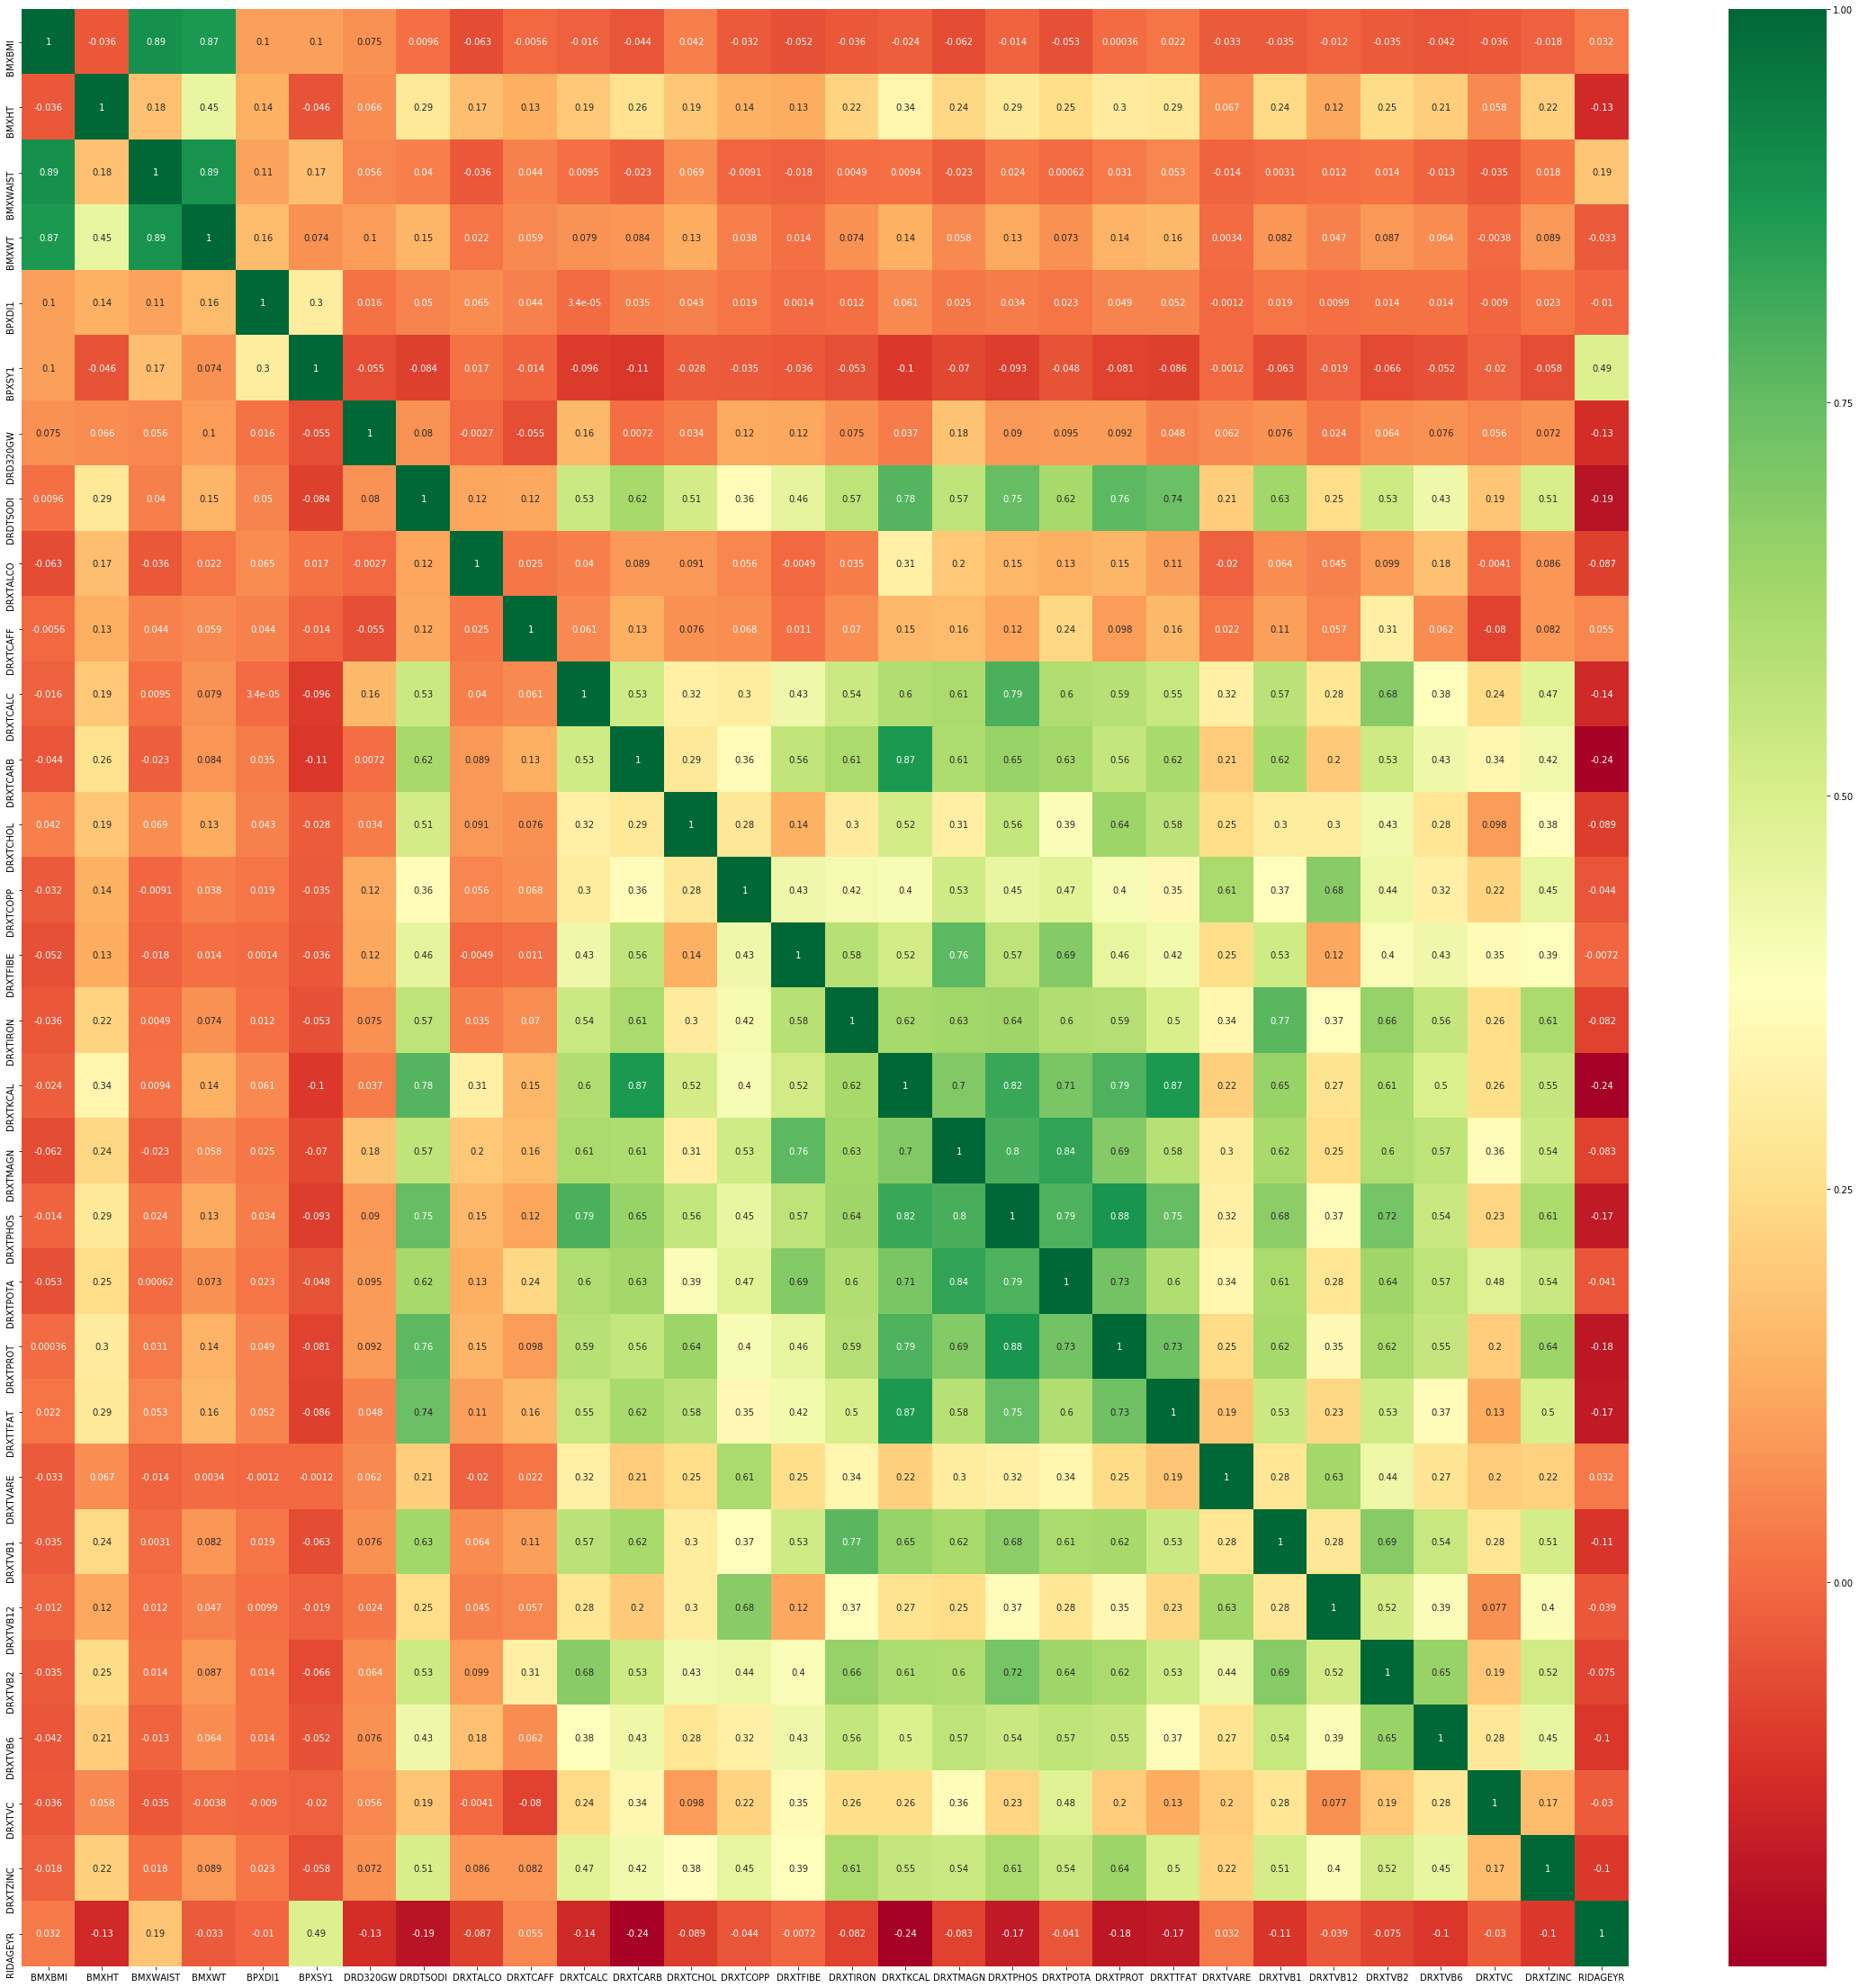

In [39]:
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [40]:
#cor_target = abs(corrmat[label])
#relevant_features = cor_target[cor_target>0.1]
#relevant_features

# Create X and y

In [41]:
#Drop variables
#Create X - drop id, label, and sample weight
X = df.drop(['_id', label], axis=1)

#Maintain id of X's
X_idx = df[['_id']]

#Create y - label
y = df[[label]]

#Create column to stratify based on year
year = df[['Year']]

In [42]:
X.shape

(33074, 59)

# Split Train, Test

In [43]:
#Train, test, split
from sklearn.model_selection import train_test_split, cross_val_score

In [44]:
#Stratify Train, Test based on Year Value
#80% Training, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=year)

In [45]:
#y_true is test label
y_true = y_test[label]

In [46]:
df['Year'].value_counts()

5    4347
4    4266
7    3911
8    3860
6    3615
1    3543
3    3489
2    3139
0    2904
Name: Year, dtype: int64

## Check if Stratified Sampling Worked

In [47]:
#See if years are split evenly in training and test
xt = X_train['Year'].value_counts()
xte = X_test['Year'].value_counts()

In [48]:
#Test is 20% of Training for each year
xte/(xte+xt)

5    0.199908
4    0.199953
7    0.199949
8    0.200000
6    0.200000
1    0.200113
3    0.200057
2    0.200064
0    0.200069
Name: Year, dtype: float64

In [49]:
#Test set label distribution
yt = y_true.value_counts()
yt

0    5986
1     629
Name: MCQ220, dtype: int64

In [50]:
yt[0]/(yt[0]+yt[1])

0.9049130763416477

In [51]:
#Train set label distribution
ytr = y_train[label].value_counts()
ytr

0    24007
1     2452
Name: MCQ220, dtype: int64

In [52]:
ytr[0]/(ytr[0]+ytr[1])

0.9073283192864432

# Resample: Upsample and Downsample (Not Used)

We have imbalanced data, so we want to do upsampling and downsampling to see if it will improve the model

In [53]:
from sklearn.utils import resample

In [54]:
#Resample training data function
def resample_train(X_train, y_train, sample_type, label):
    #Concatenate our training data back together
    X_r = pd.concat([X_train, y_train], axis=1)
    
    #Separate minority and majority classes
    minority = X_r[X_r[label]==1]
    majority = X_r[X_r[label]==0]
    
    if (sample_type=='up'):
        #Upsample minority class
        resampled = resample(minority,
                           replace=True, #Sample with replacement
                           n_samples=len(majority), #Match number in majority class
                           random_state=0) #Reproducible results
        notsampled=majority
    
    if (sample_type=='down'):
        #Downsample majority class
        resampled = resample(majority,
                           replace=False, #Sample without replacement
                           n_samples=len(minority), #Match minority n
                           random_state=0) #Reproducible results
        notsampled=minority
    
    #Combine upsample or downsample of majority and minority
    sampled = pd.concat([resampled, notsampled])
    y_train = sampled[[label]]
    X_train = sampled.drop([label], axis=1)
    return X_train, y_train    

#### Sklearn Upsampled

In [55]:
X_train_u, y_train_u = resample_train(X_train, y_train, 'up', label)

In [56]:
y_train_u[y_train_u[label]==1].shape

(24007, 1)

In [57]:
y_train_u[y_train_u[label]==0].shape

(24007, 1)

#### Sklearn Downsampled

In [58]:
X_train_d, y_train_d = resample_train(X_train, y_train, 'down', label)

In [59]:
y_train_d[y_train_d[label]==1].shape

(2452, 1)

In [60]:
y_train_d[y_train_d[label]==0].shape

(2452, 1)

# Imbalance Learn - SMOTE (Up) and TomekLinks (Down)

### Upsampling - SMOTE

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
sm = SMOTE(random_state=1)

In [63]:
X_sm, y_sm = sm.fit_sample(X_train, y_train.values.ravel())

In [64]:
#Before upsampling - Majority
len(y_train[y_train[label]==0])

24007

In [65]:
#Before upsampling - Minority
len(y_train[y_train[label]==1])

2452

In [66]:
#After upsampling, majority and minority match
sum(y_sm==0)

24007

In [67]:
sum(y_sm==1)

24007

### Downsampling - Tomeklinks

In [68]:
from imblearn.under_sampling import TomekLinks

In [69]:
tLinks = TomekLinks(random_state = 0, return_indices = True)

In [70]:
X_tl, y_tl, id_tl = tLinks.fit_sample(X_train, y_train.values.ravel())

In [71]:
#Before downsampling - Majority
len(y_train[y_train[label]==0])

24007

In [72]:
#Before downsampling - Minority
len(y_train[y_train[label]==1])

2452

In [73]:
#After downsampling, majority decreases in neighbors
sum(y_tl==0)

23117

In [74]:
sum(y_tl==1)

2452

# Clean Columns for Training Data

## Regular Training and Test

In [75]:
X_cols = list(X_train.columns)

#Get MEC18YR from training & test data
Xtr_sw = X_train[['MEC18YR']]
Xts_sw = X_test[['MEC18YR']]

#Get DRX18YR from training & test data
Xtr_dsw = X_train[['DRX18YR']]
Xts_dsw = X_test[['DRX18YR']]

#Get Year from training & test data
Xtr_yr = X_train[['Year']]
Xts_yr = X_test[['Year']]

#Drop columns for training
X_train = X_train.drop(['MEC18YR','DRX18YR','Year'], axis=1)
X_test = X_test.drop(['MEC18YR','DRX18YR','Year'], axis=1)

## SMOTE

In [76]:
X_sm = pd.DataFrame(X_sm, columns = X_cols)

In [77]:
X_sm.head()

,ALQ101_2_0,BMXBMI,BMXHT,BMXWAIST,BMXWT,BPQ020_2_0,BPXDI1,BPXPULS_2_0,BPXSY1,DMDBORN4_2_0,DMDCITZN_2_0,DMDHHSIZ,DMDHREDU,DRD320GW,DRDTSODI,DRXTALCO,DRXTCAFF,DRXTCALC,DRXTCARB,DRXTCHOL,DRXTCOPP,DRXTFIBE,DRXTIRON,DRXTKCAL,DRXTMAGN,DRXTPHOS,DRXTPOTA,DRXTPROT,DRXTTFAT,DRXTVARE,DRXTVB1,DRXTVB12,DRXTVB2,DRXTVB6,DRXTVC,DRXTZINC,HID010_2_0,HUQ010,HUQ020_2_0,HUQ020_3_0,HUQ030_2_0,HUQ030_3_0,HUQ050,HUQ070_2_0,INDFMINC,PAQ635_2_0,PAQ650_2_0,PAQ665_2_0,RIAGENDR_2_0,RIDAGEYR,RIDRETH1_2_0,RIDRETH1_3_0,RIDRETH1_4_0,RIDRETH1_5_0,SMD410_2_0,SMQ680_2_0,Year,MEC18YR,DRX18YR
0,1.0,30.80,170.3,106.3,89.3,0.0,68.0,0.0,124.0,0.0,0.0,3.0,4.0,2160.00,8208.00,5.397605e-79,5.397605e-79,1533.00,287.85,1227.00,1.738,19.90,23.93,3437.00,321.00,2520.00,2894.00,168.26,180.17,1043.00,3.048,6.52,3.208,2.378,28.00,16.77,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,7.0,1.0,0.0,0.0,1.0,43.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,2914.817378,1800.236049
1,0.0,22.50,164.5,92.4,60.8,1.0,78.0,0.0,124.0,0.0,0.0,3.0,3.0,474.00,4724.00,5.397605e-79,8.000000e+01,178.00,177.75,71.00,0.511,6.10,6.16,1070.00,153.00,384.00,1863.00,22.98,32.84,388.00,0.705,0.36,0.717,0.622,122.00,2.89,0.0,2.0,0.0,1.0,0.0,0.0,3.0,1.0,11.0,1.0,0.0,1.0,1.0,54.0,0.0,1.0,0.0,0.0,1.0,1.0,6.0,18071.303439,9977.728498
2,0.0,32.05,156.0,107.4,78.0,0.0,54.0,0.0,134.0,0.0,0.0,1.0,2.0,710.40,3183.00,9.300000e+00,1.280000e+02,706.00,281.76,355.00,2.485,12.40,15.06,1891.00,246.00,1042.00,3827.00,62.41,53.45,579.00,1.282,6.89,1.757,1.335,58.00,34.89,0.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,8.0,1.0,1.0,1.0,1.0,64.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1558.600865,1326.780695
3,1.0,27.17,177.2,111.2,85.3,0.0,66.0,0.0,122.0,0.0,0.0,5.0,3.0,1940.44,5645.00,5.397605e-79,1.010000e+02,1095.00,342.54,197.00,1.710,34.10,38.33,2209.00,491.00,1406.00,3181.00,80.50,60.10,1937.00,3.429,7.38,3.124,4.548,120.60,25.15,0.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,6.0,1.0,1.0,0.0,1.0,52.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,2773.848598,5226.718704
4,0.0,23.62,174.7,82.3,72.1,1.0,70.0,0.0,98.0,0.0,0.0,2.0,5.0,1770.00,6202.42,1.235000e+01,1.728100e+02,1587.05,457.77,785.97,2.360,46.84,35.23,3971.47,597.18,2587.38,5804.05,159.46,166.85,1772.89,3.700,4.56,3.730,4.670,84.94,18.44,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,11.0,1.0,0.0,0.0,0.0,60.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5243.964043,6724.997012


In [78]:
#Get MEC18YR from training
Xsm_sw = X_sm[['MEC18YR']]

#Get DRX18YR from training
Xsm_dsw = X_sm[['DRX18YR']]

#Get Year from training
Xsm_yr = X_sm[['Year']]

#Drop columns for training
X_sm = X_sm.drop(['MEC18YR','DRX18YR','Year'], axis=1)

## TomekLinks

In [79]:
X_tl = pd.DataFrame(X_tl, columns = X_cols)

In [80]:
#Get MEC18YR from training
Xtl_sw = X_tl[['MEC18YR']]

#Get DRX18YR from training
Xtl_dsw = X_tl[['DRX18YR']]

#Get Year from training
Xtl_yr = X_tl[['Year']]

#Drop sample weight
X_tl = X_tl.drop(['MEC18YR','DRX18YR','Year'], axis=1)

# Feature Selection

In [81]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#### Drop MEC sample weight for X for feature selection

In [82]:
Xd = df_no.drop(['_id',label,'MEC18YR','DRX18YR','Year'], axis=1)
yd = df_no[label]

### Feature Selection

In [83]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=30)
fit = bestfeatures.fit(Xd,yd)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xd.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs          Score
14  DRDTSODI  113773.005248
23  DRXTKCAL   74540.387223
13  DRD320GW   26534.387936
25  DRXTPHOS   24352.066404
47  RIDAGEYR   18270.963248
29  DRXTVARE   17124.414379
19  DRXTCHOL    8843.101550
18  DRXTCARB    8617.140794
16  DRXTCAFF    6410.953660
17  DRXTCALC    5931.890578


### OHE Feature Selection

In [84]:
Xd = df.drop(['_id',label,'MEC18YR','DRX18YR','Year'], axis=1)
yd = df[label]

In [85]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xd,yd)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xd.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs          Score
14  DRDTSODI  113773.005248
23  DRXTKCAL   74540.387223
13  DRD320GW   26534.387936
25  DRXTPHOS   24352.066404
49  RIDAGEYR   18270.963248
29  DRXTVARE   17124.414379
19  DRXTCHOL    8843.101550
18  DRXTCARB    8617.140794
16  DRXTCAFF    6410.953660
17  DRXTCALC    5931.890578


# Data Analysis: Random Forest and XGBoost

### Import Machine Learning Libraries

In [86]:
#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import plot_importance

#Grid Search
from sklearn.model_selection import GridSearchCV

#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score
from sklearn.metrics import mean_squared_error, classification_report, f1_score

# Random Forest

## GridSearch: Define parameters and run

### Regular Training

In [87]:
# clf = RandomForestClassifier(random_state=1)

# #Define Parameter Grid for GridSearchCV
# param_grid = {
#     'n_estimators' : [200],
#     'max_features' : ['auto'],
#     'max_depth' : [4, 6, 8, 15],
#     'criterion' : ['gini'],
#     'class_weight' : [{0:0.1, 1:0.9},'balanced']
# }

In [88]:
#cv_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', verbose=2, cv=3)

In [89]:
#cv_rfc.fit(X_train, y_train.values.ravel())

In [90]:
# cv_rfc.best_params_
# # {'class_weight': {0: 0.1, 1: 0.9},
# #  'criterion': 'gini',
# #  'max_depth': 8,
# #  'max_features': 'auto',
# #  'n_estimators': 200}

In [91]:
# cv_rfc.best_estimator_
# # RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
# #             criterion='gini', max_depth=8, max_features='auto',
# #             max_leaf_nodes=None, min_impurity_decrease=0.0,
# #             min_impurity_split=None, min_samples_leaf=1,
# #             min_samples_split=2, min_weight_fraction_leaf=0.0,
# #             n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
# #             verbose=0, warm_start=False)

In [92]:
# cv_rfc.best_score_
# #0.3581766394836779

### Upsampling: SMOTE

In [93]:
#clf_u = RandomForestClassifier(random_state=1)

In [94]:
#cv_rfc_u = GridSearchCV(estimator=clf_u, param_grid=param_grid, scoring='f1', verbose=2, cv=3)

In [95]:
#cv_rfc_u.fit(X_sm, y_sm)

In [96]:
# cv_rfc_u.best_params_
# # {'class_weight': 'balanced',
# #  'criterion': 'gini',
# #  'max_depth': 15,
# #  'max_features': 'auto',
# #  'n_estimators': 200}

In [97]:
# cv_rfc_u.best_estimator_
# # RandomForestClassifier(bootstrap=True, class_weight='balanced',
# #             criterion='gini', max_depth=15, max_features='auto',
# #             max_leaf_nodes=None, min_impurity_decrease=0.0,
# #             min_impurity_split=None, min_samples_leaf=1,
# #             min_samples_split=2, min_weight_fraction_leaf=0.0,
# #             n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
# #             verbose=0, warm_start=False)

In [98]:
# cv_rfc_u.best_score_
# #0.9257755340109282

### Downsampling: TomekLinks

In [99]:
#clf_d = RandomForestClassifier(random_state=1)

In [100]:
#cv_rfc_d = GridSearchCV(estimator= clf_d, param_grid=param_grid, scoring='f1', verbose=2, cv=3)

In [101]:
#cv_rfc_d.fit(X_tl, y_tl)

In [102]:
# cv_rfc_d.best_params_
# # {'class_weight': {0: 0.1, 1: 0.9},
# #  'criterion': 'gini',
# #  'max_depth': 8,
# #  'max_features': 'auto',
# #  'n_estimators': 200}

In [103]:
# cv_rfc_d.best_estimator_
# # RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
# #             criterion='gini', max_depth=8, max_features='auto',
# #             max_leaf_nodes=None, min_impurity_decrease=0.0,
# #             min_impurity_split=None, min_samples_leaf=1,
# #             min_samples_split=2, min_weight_fraction_leaf=0.0,
# #             n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
# #             verbose=0, warm_start=False)

In [104]:
# cv_rfc_d.best_score_
# #0.36731349339958513

## Define Classifier with Best Parameters and Fit

### Regular Training

In [105]:
clf_r = RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [106]:
clf_r.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

### Upsampling: SMOTE

In [107]:
clf_s = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [108]:
clf_s.fit(X_sm, y_sm)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

### Downsampling: TomekLinks

In [109]:
clf_t = RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [110]:
clf_t.fit(X_tl, y_tl)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

## Feature Importance from Random Forest

### Regular Training

In [111]:
rf_output = pd.DataFrame(clf_r.feature_importances_) #Get importance of features in order
rf_output['Label'] = X_train.columns
rf_output.columns = ['Feature_Importance', 'Label']

In [112]:
rf_oo_r = rf_output.nlargest(10, 'Feature_Importance')

In [113]:
rf_oo_r_s = rf_oo_r.sort_values(by=['Feature_Importance'])

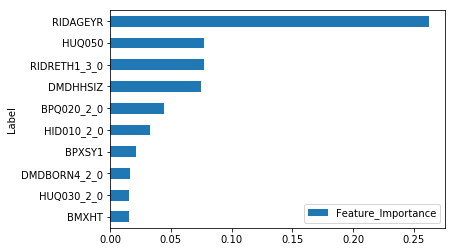

In [114]:
ax_r = rf_oo_r_s.plot.barh(y='Feature_Importance', x='Label')

### Upsampling: SMOTE

In [115]:
rf_output = pd.DataFrame(clf_s.feature_importances_)
rf_output['Label'] = X_sm.columns
rf_output.columns = ['Feature_Importance', 'Label']

In [116]:
rf_oo_u = rf_output.nlargest(10, 'Feature_Importance')

In [117]:
rf_oo_u_s = rf_oo_u.sort_values(by=['Feature_Importance'])

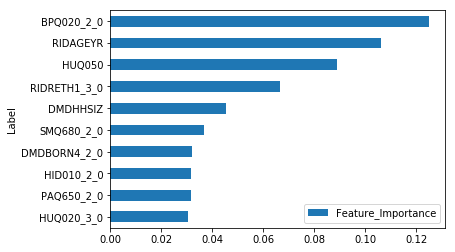

In [118]:
ax_u = rf_oo_u_s.plot.barh(y='Feature_Importance', x='Label')

### Downsampling: TomekLinks

In [119]:
rf_output = pd.DataFrame(clf_t.feature_importances_)
rf_output['Label'] = X_tl.columns
rf_output.columns = ['Feature_Importance', 'Label']

In [120]:
rf_oo_d = rf_output.nlargest(10, 'Feature_Importance')

In [121]:
rf_oo_d_s = rf_oo_d.sort_values(by=['Feature_Importance'])

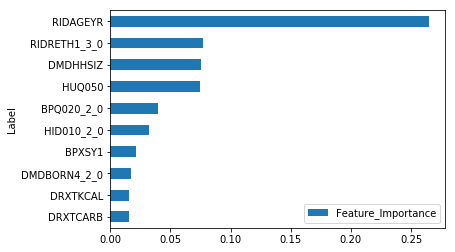

In [122]:
ax_d = rf_oo_d_s.plot.barh(y='Feature_Importance', x='Label')

# Model Evaluation

## Confusion Matrix & Classification Reports

### Regular Training

In [123]:
pred_r = clf_r.predict(X_test)

In [124]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_r, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,4709,1277,5986
1,216,413,629
All,4925,1690,6615


In [125]:
r_output = '{} \n Accuracy: {}'
r = r_output.format(classification_report(y_true, pred_r, labels=[0,1]), accuracy_score(y_true, pred_r))
print(r)

              precision    recall  f1-score   support

           0       0.96      0.79      0.86      5986
           1       0.24      0.66      0.36       629

   micro avg       0.77      0.77      0.77      6615
   macro avg       0.60      0.72      0.61      6615
weighted avg       0.89      0.77      0.81      6615
 
 Accuracy: 0.7743008314436886


### Upsampling: SMOTE

In [126]:
pred_s = clf_s.predict(X_test)

In [127]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_s, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,5792,194,5986
1,514,115,629
All,6306,309,6615


In [128]:
u_output = '{} \n Accuracy: {}'
u = u_output.format(classification_report(y_true, pred_s, labels=[0,1]), accuracy_score(y_true, pred_s))
print(u)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5986
           1       0.37      0.18      0.25       629

   micro avg       0.89      0.89      0.89      6615
   macro avg       0.65      0.58      0.59      6615
weighted avg       0.87      0.89      0.88      6615
 
 Accuracy: 0.8929705215419501


### Downsampling: TomekLinks

In [129]:
pred_t = clf_t.predict(X_test)

In [130]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_t, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,4665,1321,5986
1,201,428,629
All,4866,1749,6615


In [131]:
d_output = '{} \n Accuracy: {}'
d = d_output.format(classification_report(y_true, pred_t, labels=[0,1]), accuracy_score(y_true, pred_t))
print(d)

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      5986
           1       0.24      0.68      0.36       629

   micro avg       0.77      0.77      0.77      6615
   macro avg       0.60      0.73      0.61      6615
weighted avg       0.89      0.77      0.81      6615
 
 Accuracy: 0.7699168556311413


## ROC AUC Score

### Regular Training

In [132]:
prob_y_2_r = clf_r.predict_proba(X_test)
prob_y_2_r = [p[1] for p in prob_y_2_r]
print('ROC AUC Score: ', roc_auc_score(y_true, prob_y_2_r))

ROC AUC Score:  0.8112665642195328


### Upsampling:  SMOTE

In [133]:
prob_y_2_s = clf_s.predict_proba(X_test)
prob_y_2_s = [p[1] for p in prob_y_2_s]
print('ROC AUC Score: ', roc_auc_score(y_true, prob_y_2_s))

ROC AUC Score:  0.8103125629117649


### Downsampling: TomekLinks

In [134]:
prob_y_2_t = clf_t.predict_proba(X_test)
prob_y_2_t = [p[1] for p in prob_y_2_t]
print('ROC AUC Score: ', roc_auc_score(y_true, prob_y_2_t))

ROC AUC Score:  0.8091216548204422


## Adjust Predictions Based on Probability Threshold

In [135]:
#Import Metrics
from sklearn.metrics import recall_score, precision_score

In [136]:
#Custom cutoff probability
def cutoff_predict(clf, X, cutoff):
    return (clf.predict_proba(X)[:,1]> cutoff).astype(int)

#Custom scoring function
def custom_f1(cutoff):
    def f1_cutoff(clf, X, y):
        ypred = cutoff_predict(clf, X, cutoff)
        return f1_score(y, ypred)
    return f1_cutoff

### Regular Training

In [137]:
scores_r = []
cutoffs_r = np.arange(0.4, 0.8, 0.05)

for cutoff in cutoffs_r:
    validated = cross_val_score(clf_r, X_train, y_train.values.ravel(), cv = 3, scoring = custom_f1(cutoff), verbose = 1)
    scores_r.append(validated)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   25.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [138]:
scores_r

[array([0.33532934, 0.33599574, 0.32417732]),
 array([0.35146967, 0.34453782, 0.33931889]),
 array([0.36416819, 0.35775714, 0.35260323]),
 array([0.37370242, 0.36094438, 0.3567202 ]),
 array([0.35477387, 0.36423221, 0.36238981]),
 array([0.34256055, 0.36619718, 0.33294931]),
 array([0.2992126 , 0.28144989, 0.29407566]),
 array([0.15674603, 0.16901408, 0.16650532])]

In [139]:
#Melt and make scores into dataframe
scores_rdf = pd.DataFrame(scores_r.copy())
#Rename columns
scores_rdf['Cutoff'] = pd.DataFrame(cutoffs_r).round(2)
#Create cutoff column values
scores_rdf = pd.melt(scores_rdf, id_vars='Cutoff')
scores_rdf.columns = ['Cutoff', 'CV', 'F Score'] 

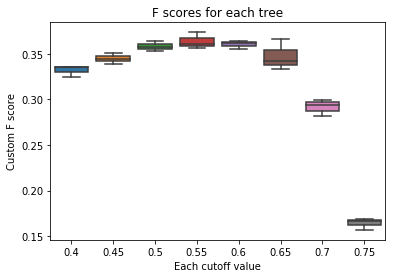

In [140]:
#Boxplot of 3-CV to determine F Score
sns.boxplot(x='Cutoff', y='F Score', data = scores_rdf)
plt.title('F scores for each tree')
plt.xlabel('Each cutoff value')
plt.ylabel('Custom F score')
plt.show()

Looks like the optimal cutoff is 0.55

In [141]:
cutoff_r = 0.55

### Upsampling: SMOTE

In [142]:
# scores_u = []
cutoffs_u = np.arange(0.45, 0.7, 0.05)

# for cutoff in cutoffs_u:
#     validated = cross_val_score(clf_s, X_sm, y_sm, cv = 3, scoring = custom_f1(cutoff), verbose = 1)
#     scores_u.append(validated)

In [143]:
# scores_u output
# [array([0.83900421, 0.96157778, 0.96488476]),
#  array([0.82991818, 0.97242345, 0.97499695]),
#  array([0.82307298, 0.98008115, 0.9830112 ]),
#  array([0.81712177, 0.98480243, 0.9889537 ]),
#  array([0.80981048, 0.98660658, 0.9888118 ])]

In [144]:
scores_u_saved = [[0.83900421, 0.96157778, 0.96488476],
 [0.82991818, 0.97242345, 0.97499695],
 [0.82307298, 0.98008115, 0.9830112 ],
 [0.81712177, 0.98480243, 0.9889537 ],
 [0.80981048, 0.98660658, 0.9888118 ]]

In [145]:
#Melt and make scores into dataframe
scores_udf = pd.DataFrame(scores_u_saved.copy())
#Rename columns
scores_udf['Cutoff'] = pd.DataFrame(cutoffs_u).round(2)
#Create cutoff column values
scores_udf = pd.melt(scores_udf, id_vars='Cutoff')
scores_udf.columns = ['Cutoff', 'CV', 'F Score'] 

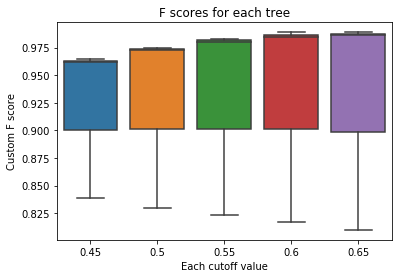

In [146]:
#Boxplot of 3-CV to determine F Score
sns.boxplot(x='Cutoff', y='F Score', data = scores_udf)
plt.title('F scores for each tree')
plt.xlabel('Each cutoff value')
plt.ylabel('Custom F score')
plt.show()

In [147]:
scores_udf.groupby('Cutoff').mean()

,F Score
Cutoff,
0.45,0.921822
0.50,0.925780
0.55,0.928722
0.60,0.930293
0.65,0.928410


Looks like the optimal cutoff is 0.60

In [237]:
cutoff_u = 0.60

### Downsampling: TomekLinks

In [149]:
#scores_d = []
cutoffs_d = np.arange(0.4, 0.7, 0.05)

# for cutoff in cutoffs_d:
#     validated = cross_val_score(clf_t, X_tl, y_tl, cv = 3, scoring = custom_f1(cutoff), verbose = 1)
#     scores_d.append(validated)

In [150]:
# scores_d output
# [array([0.35070028, 0.34282615, 0.33001658]),
#  array([0.36439321, 0.35947513, 0.35146967]),
#  array([0.37582418, 0.3649635 , 0.36115108]),
#  array([0.38546069, 0.3733871 , 0.3680203 ]),
#  array([0.38435208, 0.3764596 , 0.37062257]),
#  array([0.35897436, 0.36698271, 0.36445954])]

In [151]:
scores_d_saved = [[0.35070028, 0.34282615, 0.33001658],
 [0.36439321, 0.35947513, 0.35146967],
 [0.37582418, 0.3649635 , 0.36115108],
 [0.38546069, 0.3733871 , 0.3680203 ],
 [0.38435208, 0.3764596 , 0.37062257],
 [0.35897436, 0.36698271, 0.36445954]]

In [152]:
#Melt and make scores into dataframe
scores_ddf = pd.DataFrame(scores_d_saved.copy())
#Rename columns
scores_ddf['Cutoff'] = pd.DataFrame(cutoffs_d).round(2)
#Create cutoff column values
scores_ddf = pd.melt(scores_ddf, id_vars='Cutoff')
scores_ddf.columns = ['Cutoff', 'CV', 'F Score'] 

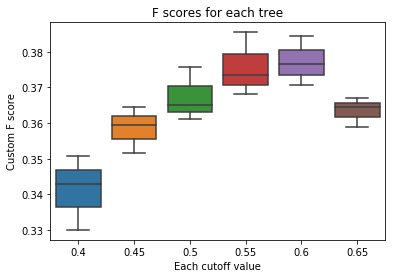

In [153]:
#Boxplot of 3-CV to determine F Score
sns.boxplot(x='Cutoff', y='F Score', data = scores_ddf)
plt.title('F scores for each tree')
plt.xlabel('Each cutoff value')
plt.ylabel('Custom F score')
plt.show()

In [154]:
scores_ddf.groupby('Cutoff').mean()

,F Score
Cutoff,
0.40,0.341181
0.45,0.358446
0.50,0.367313
0.55,0.375623
0.60,0.377145
0.65,0.363472


Looks like the optimal is 0.60

In [155]:
cutoff_d = 0.60

## Model Evaluation based on Optimal Probability Cutoff

### Regular Training

In [156]:
pred_rc = np.where(pd.DataFrame(prob_y_2_r)>cutoff_r, 1, 0).flatten()

In [157]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_rc, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,4999,987,5986
1,256,373,629
All,5255,1360,6615


In [158]:
rc_output = '{} \n Accuracy: {}'
rc = rc_output.format(classification_report(y_true, pred_rc, labels=[0,1]), accuracy_score(y_true, pred_rc))
print(rc)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5986
           1       0.27      0.59      0.38       629

   micro avg       0.81      0.81      0.81      6615
   macro avg       0.61      0.71      0.63      6615
weighted avg       0.89      0.81      0.84      6615
 
 Accuracy: 0.8120937263794407


In [159]:
#Compare with default cutoff 0.5
print(r)

              precision    recall  f1-score   support

           0       0.96      0.79      0.86      5986
           1       0.24      0.66      0.36       629

   micro avg       0.77      0.77      0.77      6615
   macro avg       0.60      0.72      0.61      6615
weighted avg       0.89      0.77      0.81      6615
 
 Accuracy: 0.7743008314436886


### Upsampling: SMOTE 

In [238]:
pred_uc = np.where(pd.DataFrame(prob_y_2_s)>cutoff_u, 1, 0).flatten()

In [242]:
cutoff_u

0.6

In [239]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_uc, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,5929,57,5986
1,584,45,629
All,6513,102,6615


In [240]:
uc_output = '{} \n Accuracy: {}'
uc = uc_output.format(classification_report(y_true, pred_uc, labels=[0,1]), accuracy_score(y_true, pred_uc))
print(uc)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5986
           1       0.44      0.07      0.12       629

   micro avg       0.90      0.90      0.90      6615
   macro avg       0.68      0.53      0.54      6615
weighted avg       0.87      0.90      0.87      6615
 
 Accuracy: 0.9030990173847316


In [241]:
#Compare with default cutoff 0.5
print(u)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5986
           1       0.37      0.18      0.25       629

   micro avg       0.89      0.89      0.89      6615
   macro avg       0.65      0.58      0.59      6615
weighted avg       0.87      0.89      0.88      6615
 
 Accuracy: 0.8929705215419501


### Downsampling: TomekLinks

In [164]:
pred_dc = np.where(pd.DataFrame(prob_y_2_t)>cutoff_d, 1, 0).flatten()

In [165]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_dc, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,5193,793,5986
1,302,327,629
All,5495,1120,6615


In [166]:
dc_output = '{} \n Accuracy: {}'
dc = dc_output.format(classification_report(y_true, pred_dc, labels=[0,1]), accuracy_score(y_true, pred_dc))
print(dc)

              precision    recall  f1-score   support

           0       0.95      0.87      0.90      5986
           1       0.29      0.52      0.37       629

   micro avg       0.83      0.83      0.83      6615
   macro avg       0.62      0.69      0.64      6615
weighted avg       0.88      0.83      0.85      6615
 
 Accuracy: 0.8344671201814059


In [167]:
print(d)

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      5986
           1       0.24      0.68      0.36       629

   micro avg       0.77      0.77      0.77      6615
   macro avg       0.60      0.73      0.61      6615
weighted avg       0.89      0.77      0.81      6615
 
 Accuracy: 0.7699168556311413


## XGBOOST

In [168]:
# # A parameter grid for XGBoost
# params = {
#         'max_depth': [3, 4, 6],
#         'subsample': [1.0],
#         'colsample_bytree': [0.6, 1.0],
#         'scale_pos_weight': [8, 10, 12],
#         'learning_rate' : [0.1],
#         'n_estimators' : [200]
#         }

### Regular Training

#### GridSearch

In [169]:
#xg_class_r = xgb.XGBClassifier(objective ='binary:logistic', random_state = 1, verbose = 1)

In [170]:
#cv_xgr = GridSearchCV(estimator=xg_class_r, param_grid=params, scoring='f1', verbose=2, cv=3)

In [171]:
#cv_xgr.fit(X_train, y_train.values.ravel())

In [172]:
# cv_xgr.best_params_
# # {'colsample_bytree': 1.0,
# #  'learning_rate': 0.1,
# #  'max_depth': 4,
# #  'n_estimators': 200,
# #  'scale_pos_weight': 8,
# #  'subsample': 1.0}

In [173]:
# cv_xgr.best_score_
# #0.3573153004387054

#### Best Parameter

In [174]:
#cv_xgr.best_estimator_

In [175]:
xg_clf_r = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=8, seed=None,
       silent=True, subsample=1.0, verbose=1)

#### Predict

In [176]:
xg_clf_r.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=8, seed=None,
       silent=True, subsample=1.0, verbose=1)

In [177]:
pred_xgr = xg_clf_r.predict(X_test)

#### Evaluation

In [178]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_xgr, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,4716,1270,5986
1,214,415,629
All,4930,1685,6615


In [179]:
rxg_output = '{} \n Accuracy: {}'
rxg = rxg_output.format(classification_report(y_true, pred_xgr, labels=[0,1]), accuracy_score(y_true, pred_xgr))
print(rxg)

              precision    recall  f1-score   support

           0       0.96      0.79      0.86      5986
           1       0.25      0.66      0.36       629

   micro avg       0.78      0.78      0.78      6615
   macro avg       0.60      0.72      0.61      6615
weighted avg       0.89      0.78      0.82      6615
 
 Accuracy: 0.7756613756613756


##### Compare with Random Forest

In [180]:
print(r)

              precision    recall  f1-score   support

           0       0.96      0.79      0.86      5986
           1       0.24      0.66      0.36       629

   micro avg       0.77      0.77      0.77      6615
   macro avg       0.60      0.72      0.61      6615
weighted avg       0.89      0.77      0.81      6615
 
 Accuracy: 0.7743008314436886


#### Feature Importance for XGBoost 

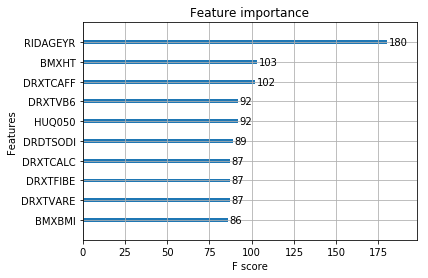

In [181]:
plot_importance(xg_clf_r, max_num_features = 10)

### Upsampling: SMOTE

#### GridSearch

In [182]:
#xg_class_u = xgb.XGBClassifier(objective ='binary:logistic', random_state = 1, verbose = 1)

In [183]:
#cv_xgu = GridSearchCV(estimator=xg_class_u, param_grid=params, scoring='f1', verbose=2, cv=3)

In [184]:
#cv_xgu.fit(X_sm, y_sm)

In [185]:
# cv_xgu.best_params_
# # {'colsample_bytree': 0.6,
# #  'learning_rate': 0.1,
# #  'max_depth': 6,
# #  'n_estimators': 200,
# #  'scale_pos_weight': 8,
# #  'subsample': 1.0}

In [186]:
# cv_xgu.best_score_
# #0.8756375727843866

#### Best Parameter

In [187]:
#cv_xgu.best_estimator_

In [188]:
xg_clf_u = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=8, seed=None,
       silent=True, subsample=1.0, verbose=1)

#### Predict

In [189]:
xg_clf_u.fit(X_sm, y_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=8, seed=None,
       silent=True, subsample=1.0, verbose=1)

In [190]:
pred_xgu = xg_clf_u.predict(X_test)

#### Evaluation

In [191]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_xgu, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,4962,1024,5986
1,252,377,629
All,5214,1401,6615


In [192]:
uxg_output = '{} \n Accuracy: {}'
uxg = uxg_output.format(classification_report(y_true, pred_xgu, labels=[0,1]), accuracy_score(y_true, pred_xgu))
print(uxg)

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      5986
           1       0.27      0.60      0.37       629

   micro avg       0.81      0.81      0.81      6615
   macro avg       0.61      0.71      0.63      6615
weighted avg       0.89      0.81      0.84      6615
 
 Accuracy: 0.8071050642479214


##### Compare with Random Forest

In [193]:
print(u)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5986
           1       0.37      0.18      0.25       629

   micro avg       0.89      0.89      0.89      6615
   macro avg       0.65      0.58      0.59      6615
weighted avg       0.87      0.89      0.88      6615
 
 Accuracy: 0.8929705215419501


#### Feature Importance for XGBoost 

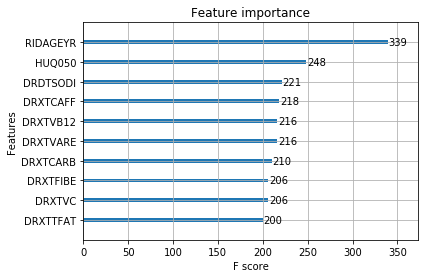

In [194]:
plot_importance(xg_clf_u, max_num_features = 10)

### Downsampling: TomekLinks

#### GridSearch

In [195]:
#xg_class_d = xgb.XGBClassifier(objective ='binary:logistic', random_state = 1, verbose = 1)

In [196]:
#cv_xgd = GridSearchCV(estimator=xg_class_d, param_grid=params, scoring='f1', verbose=2, cv=3)

In [197]:
#cv_xgd.fit(X_tl, y_tl)

In [198]:
# cv_xgd.best_params_
# # {'colsample_bytree': 0.6,
# #  'learning_rate': 0.1,
# #  'max_depth': 4,
# #  'n_estimators': 200,
# #  'scale_pos_weight': 8,
# #  'subsample': 1.0}

In [199]:
# cv_xgd.best_score_
# #0.36817336468829315

#### Best Parameter

In [200]:
#cv_xgd.best_estimator_

In [201]:
xg_clf_d = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=8, seed=None,
       silent=True, subsample=1.0, verbose=1)

#### Predict

In [202]:
xg_clf_d.fit(X_tl, y_tl)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=8, seed=None,
       silent=True, subsample=1.0, verbose=1)

In [203]:
pred_xgd = xg_clf_d.predict(X_test)

#### Evaluation

In [204]:
#Creating a confusion matrix 
print('Confusion Matrix:')
pd.crosstab(y_true, pred_xgd, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,4655,1331,5986
1,210,419,629
All,4865,1750,6615


In [205]:
dxg_output = '{} \n Accuracy: {}'
dxg = dxg_output.format(classification_report(y_true, pred_xgd, labels=[0,1]), accuracy_score(y_true, pred_xgd))
print(dxg)

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      5986
           1       0.24      0.67      0.35       629

   micro avg       0.77      0.77      0.77      6615
   macro avg       0.60      0.72      0.61      6615
weighted avg       0.89      0.77      0.81      6615
 
 Accuracy: 0.7670445956160242


##### Compare with Random Forest

In [206]:
print(d)

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      5986
           1       0.24      0.68      0.36       629

   micro avg       0.77      0.77      0.77      6615
   macro avg       0.60      0.73      0.61      6615
weighted avg       0.89      0.77      0.81      6615
 
 Accuracy: 0.7699168556311413


#### Feature Importance for XGBoost 

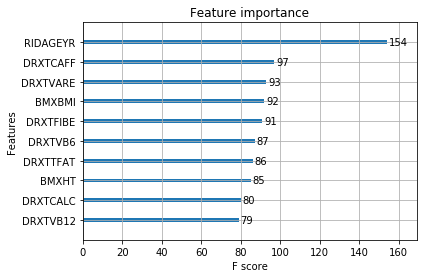

In [207]:
plot_importance(xg_clf_d, max_num_features = 10)

# Important Features: Risk Factors

### Feature Selection: Chi-Square

In [208]:
chi2_fi = featureScores.nlargest(10,'Score')
chi2_fi = chi2_fi.rename(columns={'Specs': 'Label', 'Score': 'Feature_Importance'})
chi2_fi

,Label,Feature_Importance
14,DRDTSODI,113773.005248
23,DRXTKCAL,74540.387223
13,DRD320GW,26534.387936
25,DRXTPHOS,24352.066404
49,RIDAGEYR,18270.963248
29,DRXTVARE,17124.414379
19,DRXTCHOL,8843.101550
18,DRXTCARB,8617.140794
16,DRXTCAFF,6410.953660
17,DRXTCALC,5931.890578


### Random Forest

#### Regular:

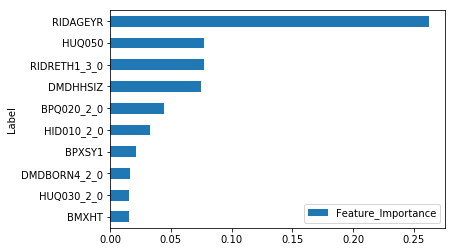

In [209]:
ax_r.figure

In [210]:
rfr_fi = rf_oo_r.copy()
rfr_fi

,Feature_Importance,Label
49,0.262609,RIDAGEYR
42,0.077528,HUQ050
51,0.077462,RIDRETH1_3_0
11,0.075078,DMDHHSIZ
5,0.043935,BPQ020_2_0
36,0.032543,HID010_2_0
8,0.021195,BPXSY1
9,0.015945,DMDBORN4_2_0
40,0.015848,HUQ030_2_0
2,0.015178,BMXHT


#### Upsample:

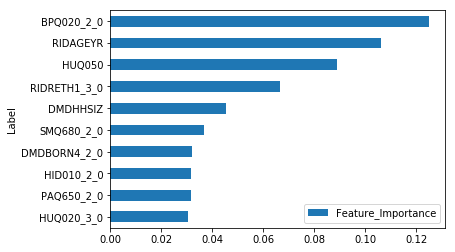

In [211]:
ax_u.figure

In [212]:
rfu_fi = rf_oo_u.copy()
rfu_fi

,Feature_Importance,Label
5,0.124922,BPQ020_2_0
49,0.106213,RIDAGEYR
42,0.088978,HUQ050
51,0.066424,RIDRETH1_3_0
11,0.045182,DMDHHSIZ
55,0.036727,SMQ680_2_0
9,0.032167,DMDBORN4_2_0
36,0.031514,HID010_2_0
46,0.031469,PAQ650_2_0
39,0.030517,HUQ020_3_0


#### Downsample:

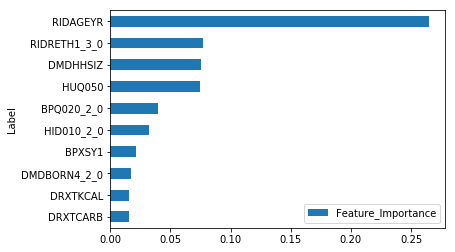

In [213]:
ax_d.figure

In [214]:
rfd_fi = rf_oo_d.copy()
rfd_fi

,Feature_Importance,Label
49,0.264907,RIDAGEYR
51,0.077202,RIDRETH1_3_0
11,0.075112,DMDHHSIZ
42,0.074432,HUQ050
5,0.039952,BPQ020_2_0
36,0.032614,HID010_2_0
8,0.021284,BPXSY1
9,0.017137,DMDBORN4_2_0
23,0.015345,DRXTKCAL
18,0.015262,DRXTCARB


### XGBoost

#### Regular

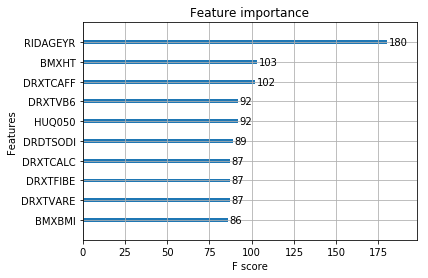

In [215]:
plot_importance(xg_clf_r, max_num_features = 10)

In [216]:
xgr_fs = xg_clf_r.get_booster().get_score(importance_type='weight')
xgr_fs = pd.DataFrame(xgr_fs.items(), columns = ['Label', 'Feature_Importance'])
xgr_fs = xgr_fs.nlargest(10, 'Feature_Importance')
xgr_fs

,Label,Feature_Importance
0,RIDAGEYR,180
15,BMXHT,103
6,DRXTCAFF,102
1,HUQ050,92
18,DRXTVB6,92
5,DRDTSODI,89
11,DRXTVARE,87
24,DRXTFIBE,87
26,DRXTCALC,87
41,BMXBMI,86


In [217]:
xgr_fi = pd.DataFrame(data = {'Feature_Importance':xg_clf_r.feature_importances_, 'Label':X_train.columns})
xgr_fi = xgr_fi.nlargest(10,'Feature_Importance')
xgr_fi

,Feature_Importance,Label
49,0.152059,RIDAGEYR
51,0.096190,RIDRETH1_3_0
42,0.045408,HUQ050
48,0.033606,RIAGENDR_2_0
36,0.033153,HID010_2_0
9,0.029577,DMDBORN4_2_0
39,0.022838,HUQ020_3_0
5,0.022797,BPQ020_2_0
43,0.021104,HUQ070_2_0
10,0.019174,DMDCITZN_2_0


#### Upsample:

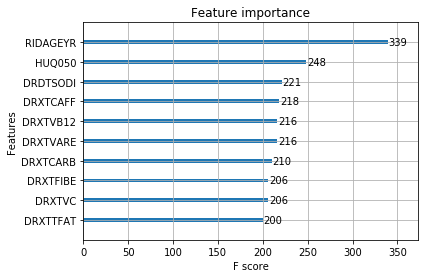

In [218]:
plot_importance(xg_clf_u, max_num_features = 10)

In [219]:
xgu_fs = xg_clf_u.get_booster().get_score(importance_type='weight')
xgu_fs = pd.DataFrame(xgu_fs.items(), columns = ['Label', 'Feature_Importance'])
xgu_fs = xgu_fs.nlargest(10, 'Feature_Importance')
xgu_fs

,Label,Feature_Importance
18,RIDAGEYR,339
19,HUQ050,248
27,DRDTSODI,221
7,DRXTCAFF,218
13,DRXTVARE,216
50,DRXTVB12,216
51,DRXTCARB,210
39,DRXTVC,206
49,DRXTFIBE,206
44,DRXTTFAT,200


In [220]:
xgu_fi = pd.DataFrame(data = {'Feature_Importance':xg_clf_u.feature_importances_, 'Label':X_sm.columns})
xgu_fi = xgu_fi.nlargest(10,'Feature_Importance')
xgu_fi

,Feature_Importance,Label
5,0.133684,BPQ020_2_0
36,0.088551,HID010_2_0
51,0.085024,RIDRETH1_3_0
42,0.050259,HUQ050
39,0.047188,HUQ020_3_0
48,0.044521,RIAGENDR_2_0
9,0.043386,DMDBORN4_2_0
46,0.042721,PAQ650_2_0
49,0.040530,RIDAGEYR
47,0.032113,PAQ665_2_0


#### Downsample:

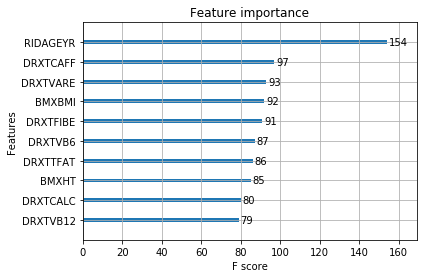

In [221]:
plot_importance(xg_clf_d, max_num_features = 10)

In [222]:
xgd_fs = xg_clf_d.get_booster().get_score(importance_type='weight')
xgd_fs = pd.DataFrame(xgd_fs.items(), columns = ['Label', 'Feature_Importance'])
xgd_fs = xgd_fs.nlargest(10, 'Feature_Importance')
xgd_fs

,Label,Feature_Importance
8,RIDAGEYR,154
15,DRXTCAFF,97
4,DRXTVARE,93
35,BMXBMI,92
18,DRXTFIBE,91
39,DRXTVB6,87
20,DRXTTFAT,86
24,BMXHT,85
28,DRXTCALC,80
7,DRDTSODI,79


In [223]:
xgd_fi = pd.DataFrame(data = {'Feature_Importance':xg_clf_d.feature_importances_, 'Label':X_tl.columns})
xgd_fi = xgd_fi.nlargest(10,'Feature_Importance')
xgd_fi

,Feature_Importance,Label
11,0.115299,DMDHHSIZ
49,0.099289,RIDAGEYR
51,0.098617,RIDRETH1_3_0
42,0.054803,HUQ050
5,0.045531,BPQ020_2_0
36,0.040594,HID010_2_0
46,0.029187,PAQ650_2_0
48,0.026861,RIAGENDR_2_0
37,0.023049,HUQ010
40,0.020221,HUQ030_2_0


# Rankings:

Weights for each ranking:

In [243]:
wts = {'chi2_fi': 0.025, 'rf_fi': .15, 'xg_fs': .10, 'xg_fi': .075}

In [244]:
#Suffix names to join on
jl = ['chi2_fi', 'rfr_fi', 'rfu_fi', 'rfd_fi', 'xgr_fs', 'xgu_fs', 'xgd_fs', 'xgr_fi', 'xgu_fi', 'xgd_fi']

In [245]:
#Outer join function
def outerjoin_df(dfs_list):
    n = 1
    df_join = dfs_list[0]
    for d in dfs_list[1:]:
        df_join = df_join.merge(d, how='outer', suffixes=('_'+jl[n-1], '_'+jl[n]), on=['Label'])
        n = n+1
    return df_join

In [246]:
#List of top 10 feature importances
join_list = [chi2_fi, rfr_fi, rfu_fi, rfd_fi, xgr_fs, xgu_fs, xgd_fs, xgr_fi, xgu_fi, xgd_fi]

In [247]:
#Joined list of top 10 feature importances
joined = outerjoin_df(join_list)

In [248]:
joined.head()

,Label,Feature_Importance_chi2_fi,Feature_Importance_rfr_fi,Feature_Importance_rfu_fi,Feature_Importance_rfd_fi,Feature_Importance_xgr_fs,Feature_Importance_xgu_fs,Feature_Importance_xgd_fs,Feature_Importance_xgr_fi,Feature_Importance_xgu_fi,Feature_Importance_xgd_fi
0,DRDTSODI,113773.005248,NaN,NaN,NaN,89.0,221.0,79.0,NaN,NaN,NaN
1,DRXTKCAL,74540.387223,NaN,NaN,0.015345,NaN,NaN,NaN,NaN,NaN,NaN
2,DRD320GW,26534.387936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DRXTPHOS,24352.066404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RIDAGEYR,18270.963248,0.262609,0.106213,0.264907,180.0,339.0,154.0,0.152059,0.04053,0.099289


In [249]:
#Get the percentage importance of top ten for each feature importance
pct_list = pd.DataFrame()
pct_list['Label'] = joined['Label']
for i, j in enumerate(jl):
    pct_list[j] = joined['Feature_Importance_'+jl[i]]/joined['Feature_Importance_'+jl[i]].sum()   

In [250]:
#Fill in NaNs with 0
pct_list = pct_list.fillna(0)
pct_list.head()

,Label,chi2_fi,rfr_fi,rfu_fi,rfd_fi,xgr_fs,xgu_fs,xgd_fs,xgr_fi,xgu_fi,xgd_fi
0,DRDTSODI,0.373764,0.000000,0.000000,0.000000,0.088557,0.096930,0.083686,0.000000,0.000000,0.0000
1,DRXTKCAL,0.244878,0.000000,0.000000,0.024232,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
2,DRD320GW,0.087170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
3,DRXTPHOS,0.080001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
4,RIDAGEYR,0.060023,0.412051,0.178776,0.418332,0.179104,0.148684,0.163136,0.319514,0.066663,0.1794


### Column for weighted overall risk factor importance ranking

In [251]:
#Weighted overall ranking
pct_list['Importance'] = pct_list[jl[0]] * wts['chi2_fi'] + pct_list[jl[1]] * wts['rf_fi'] + pct_list[jl[2]] * wts['rf_fi'] + pct_list[jl[3]] * wts['rf_fi'] + pct_list[jl[4]] * wts['xg_fs'] + pct_list[jl[5]] * wts['xg_fs'] + pct_list[jl[6]] * wts['xg_fs'] + pct_list[jl[7]] * wts['xg_fi'] + pct_list[jl[8]] * wts['xg_fi'] + pct_list[jl[9]] * wts['xg_fi']

In [252]:
pct_list.head()

,Label,chi2_fi,rfr_fi,rfu_fi,rfd_fi,xgr_fs,xgu_fs,xgd_fs,xgr_fi,xgu_fi,xgd_fi,Importance
0,DRDTSODI,0.373764,0.000000,0.000000,0.000000,0.088557,0.096930,0.083686,0.000000,0.000000,0.0000,0.036261
1,DRXTKCAL,0.244878,0.000000,0.000000,0.024232,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.009757
2,DRD320GW,0.087170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.002179
3,DRXTPHOS,0.080001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.002000
4,RIDAGEYR,0.060023,0.412051,0.178776,0.418332,0.179104,0.148684,0.163136,0.319514,0.066663,0.1794,0.244385


## Identified Top 10 Risk Factors:

In [253]:
Risk_Factors = pct_list[['Label','Importance']].copy()

In [254]:
Risk_Factors_10 = Risk_Factors.nlargest(10, 'Importance')
Risk_Factors_10

,Label,Importance
4,RIDAGEYR,0.244385
10,HUQ050,0.099157
11,RIDRETH1_3_0,0.092301
13,BPQ020_2_0,0.077598
12,DMDHHSIZ,0.062494
14,HID010_2_0,0.044991
0,DRDTSODI,0.036261
8,DRXTCAFF,0.030513
5,DRXTVARE,0.029389
23,DRXTFIBE,0.027332


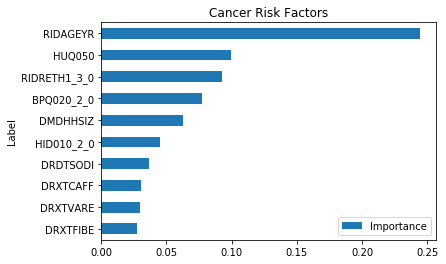

In [255]:
Risk_Factors_10 = Risk_Factors_10.sort_values(by=['Importance'])
Risk_Factors_Plot = Risk_Factors_10.plot.barh(y='Importance', x='Label', title='Cancer Risk Factors')